<a href="https://colab.research.google.com/github/Chris1Areiza/lime/blob/main/BRM_Technical_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Resolución de Prueba Técnica BRM**

##**Ejercicio 1**

###**Descripción de variables**

Para tener un mayor entendimiento, vamos a describir las variables del dataset. Se tienen en total 13 variables.

**Fecha:** Corresponde al día en que se realizó el registro. Se encuentra en formato DD/MM/YY.

**Intervalo:** Corresponde a la hora

**Inflow:** Esta variable hace referencia al número de interacciones o consultas recibidas en un determinado intervalo de tiempo. Puede referirse a llamadas telefónicas, correos electrónicos, mensajes de chat, entre otros, dependiendo del contexto de servicio al cliente o centro de llamadas.

**CSAT:** CSAT es la abreviatura de Customer Satisfaction Score. Es una medición común de cómo un cliente califica su experiencia o satisfacción con un servicio o producto en una escala de 1 a 5. Normalmente, 1 significa muy insatisfecho y 5 muy satisfecho.

**% Reopen:** Esta es la proporción o porcentaje de interacciones o casos que se han vuelto a abrir después de haber sido cerrados inicialmente. Un alto porcentaje de reapertura puede indicar problemas con la resolución de casos o la satisfacción del cliente.

**RT (min):** RT es la abreviatura de Resolution Time, que es el tiempo total que se tarda en resolver una interacción desde que se recibe hasta que se cierra. Este tiempo se suele medir en minutos.

**FRT (min):** FRT es el tiempo de respuesta promedio. Es el tiempo que se tarda en responder a un cliente desde que se recibe su interacción. Este tiempo se suele medir en minutos.

**SLA:** SLA significa Service Level Agreement. Es un acuerdo entre un proveedor de servicio y un cliente que define el nivel de servicio esperado. Puede incluir varias métricas como el tiempo de respuesta, la resolución de problemas, la disponibilidad del servicio, entre otros.

**PD:** Esta variable se refiere a la cantidad de casos que se cerraron en un determinado intervalo de tiempo. Cuanto mayor sea este número, más casos se resolvieron.

**AHT (min):** AHT es la abreviatura de Average Handle Time. Es el tiempo medio que se tarda en gestionar una interacción desde que se inicia hasta que se cierra, incluyendo el tiempo de espera y cualquier seguimiento que pueda ser necesario.

**Conectados:** Esta variable indica el número de agentes que estuvieron gestionando interacciones durante un determinado intervalo de tiempo. Este número puede ayudar a entender la capacidad de servicio en un momento dado.

**Cierres:** Esta es la cantidad total de interacciones o casos que se cerraron en un determinado intervalo de tiempo.

**Conexión intervalo (hrs):** Este es el tiempo total durante el cual los agentes estuvieron conectados y disponibles para gestionar interacciones durante un intervalo de tiempo determinado. Este tiempo se suele medir en horas.

###**Entendimiento de la data**

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.4 MB/s eta 0:00:00


In [2]:
# Importar las librerías necesarias.
import matplotlib.pyplot as plt # visualización
import numpy as np # operaciones matemáticas
import pandas as pd # análisis y manipulación de datos
import seaborn as sns # visualización
from google.colab import drive # llamar desde drive
from keras.wrappers.scikit_learn import KerasRegressor
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import warnings # ignorar los warnings

sns.set_style('whitegrid') # set style para la visualización
warnings.filterwarnings('ignore') # ignorar los warnings

<ipython-input-2-f4411bdc7ebd>:8: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
#Leer los datos desde el csv file.
drive.mount('/content/drive')
data = pd.read_csv('drive/MyDrive/data_brm.csv', sep=';', encoding='ISO-8859-1', index_col=None)

Mounted at /content/drive


In [33]:
# Imprimir la forma y los primeros registros del dataset.
print(data.shape)
data.head()

(4322, 13)


,Fecha,Intervalo,Conectados,Inflow,% Reopen,FRT (min),AHT (min),RT (min),% SLA,Cierres,Conexión Intervalo (hrs),PD,CSAT
0,1/01/2022,12:00:00 a. m.,10.0,91.0,"15,38%","588,45","9,181425","597,7713",62%,66.0,"7,475555583","8,828775235","2,230769231"
1,1/01/2022,12:30:00 a. m.,10.0,59.0,"20,34%","568,3","9,006758333","579,1451833",73%,100.0,"7,76666665","12,87553651","1,5"
2,1/01/2022,1:00:00 a. m.,6.0,31.0,"12,90%","543,3833333","6,140216667","550,3989167",68%,79.0,"7,358333317","10,73612686","2,6"
3,1/01/2022,1:30:00 a. m.,5.0,28.0,"17,86%","514,525","11,81930833","525,1912",82%,70.0,"6,894722217","10,15269329","1,333333333"
4,1/01/2022,2:00:00 a. m.,2.0,23.0,"21,74%","371,55","11,92571667","502,1804167",78%,52.0,"4,5225","11,49806523","2,571428571"


El dataset contiene 4322 registros y 13 columnas entre variables explicativas y respuesta que sería la última.

In [47]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fecha                     4322 non-null   object 
 1   Intervalo                 4322 non-null   object 
 2   Conectados                3673 non-null   float64
 3   Inflow                    4319 non-null   float64
 4   % Reopen                  4243 non-null   object 
 5   FRT (min)                 4315 non-null   object 
 6   AHT (min)                 4312 non-null   object 
 7   RT (min)                  4315 non-null   object 
 8   % SLA                     4319 non-null   object 
 9   Cierres                   4319 non-null   float64
 10  Conexión Intervalo (hrs)  4315 non-null   object 
 11  PD                        4314 non-null   object 
 12  CSAT                      4255 non-null   object 
dtypes: float64(3), object(10)
memory usage: 439.1+ KB


Se tienen missing values en las variables PD, Conexión intervalo, Cierres, SLA, RT, AHT, FRT, Inflow de entre el 0,1% y el 0,2% de los registros, en CSAT y Reopen se tiene en promedio 1,7% de missing values y la variable Conectados tiene 15% de missing values lo que es bastante considerable y puede afectar el desempeño de un modelo de aprendizaje automático.

Antes de realizar análisis sobre los datos es necesario solucionar los problemas de tipos de datos en el dataframe pues existen varias columnas tipo object que deberían ser numéricas.

In [4]:
#Corrección de tipo de datos
data['Fecha'] = pd.to_datetime(data['Fecha'], dayfirst=True)

# Lista de columnas a convertir
columns_to_convert = ['% Reopen', 'FRT (min)', 'AHT (min)', 'RT (min)', '% SLA', 'Conexión Intervalo (hrs)', 'PD', 'CSAT ']

# Lista de columnas que tienen el símbolo '%'
columns_with_percent = ['% Reopen', '% SLA']

# Convertir cada columna
for column in columns_to_convert:
    # Reemplaza las comas por puntos
    data[column] = data[column].str.replace(',', '.')

# Elimina el símbolo '%' en las columnas correspondientes
for column in columns_with_percent:
    data[column] = data[column].str.replace('%', '')

# Convierte todas las columnas a numérico
for column in columns_to_convert:
    data[column] = data[column].astype(float)

# Verifica la conversión
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     4322 non-null   datetime64[ns]
 1   Intervalo                 4322 non-null   object        
 2   Conectados                3673 non-null   float64       
 3   Inflow                    4319 non-null   float64       
 4   % Reopen                  4243 non-null   float64       
 5   FRT (min)                 4315 non-null   float64       
 6   AHT (min)                 4312 non-null   float64       
 7   RT (min)                  4315 non-null   float64       
 8   % SLA                     4319 non-null   float64       
 9   Cierres                   4319 non-null   float64       
 10  Conexión Intervalo (hrs)  4315 non-null   float64       
 11  PD                        4314 non-null   float64       
 12  CSAT                

Se observa que ahora todas las variables que deberían ser numéricas lo son ahora y que Fecha es datetime, sin embargo, Intervalo sigue como objeto, le daremos un tratamiento especial buscando que quede en formato de 24 horas del día.

In [5]:
# Primero, removemos la cadena ' a. m.' y ' p. m.' y lo reemplazamos por 'AM' y 'PM' respectivamente
data['Intervalo'] = data['Intervalo'].str.replace('\s*a\.\sm\.', 'AM', regex=True)
data['Intervalo'] = data['Intervalo'].str.replace('\s*p\.\sm\.', 'PM', regex=True)

# Segundo, convertimos la cadena a un formato datetime
data['Intervalo'] = pd.to_datetime(data['Intervalo'], format='%I:%M:%S%p')

# Tercero, convertimos datetime a timedelta
data['Intervalo'] = data['Intervalo'].dt.time

# Verificamos los cambios
print(data['Intervalo'])


0       00:00:00
1       00:30:00
2       01:00:00
3       01:30:00
4       02:00:00
          ...   
4317    21:30:00
4318    22:00:00
4319    22:30:00
4320    23:00:00
4321    23:30:00
Name: Intervalo, Length: 4322, dtype: object


Y visualizamos el dataframe con los cambios realizados:

In [22]:
data.head()

,Fecha,Intervalo,Conectados,Inflow,% Reopen,FRT (min),AHT (min),RT (min),% SLA,Cierres,Conexión Intervalo (hrs),PD,CSAT
0,2022-01-01,00:00:00,10.0,91.0,15.38,588.450000,9.181425,597.771300,62.0,66.0,7.475556,8.828775,2.230769
1,2022-01-01,00:30:00,10.0,59.0,20.34,568.300000,9.006758,579.145183,73.0,100.0,7.766667,12.875537,1.500000
2,2022-01-01,01:00:00,6.0,31.0,12.90,543.383333,6.140217,550.398917,68.0,79.0,7.358333,10.736127,2.600000
3,2022-01-01,01:30:00,5.0,28.0,17.86,514.525000,11.819308,525.191200,82.0,70.0,6.894722,10.152693,1.333333
4,2022-01-01,02:00:00,2.0,23.0,21.74,371.550000,11.925717,502.180417,78.0,52.0,4.522500,11.498065,2.571429


In [8]:
# Estadística descriptiva de los datos numéricos
data.describe()

,Conectados,Inflow,% Reopen,FRT (min),AHT (min),RT (min),% SLA,Cierres,Conexión Intervalo (hrs),PD,CSAT
count,3673.000000,4319.000000,4243.000000,4315.000000,4312.000000,4315.000000,4319.000000,4319.000000,4315.000000,4314.000000,4255.000000
mean,61.551593,195.910859,14.463788,86.279529,11.082665,100.529081,88.495948,194.701320,23.442829,8.221889,2.532453
std,34.821716,147.647459,11.375414,141.897373,15.425739,143.844883,7.213987,122.906984,14.218990,2.738307,0.636992
min,0.000000,2.000000,0.032258,0.800000,0.040000,0.155567,36.000000,2.000000,0.722500,0.499445,1.000000
25%,35.000000,39.000000,0.240660,2.366667,9.178365,15.077392,84.000000,74.000000,9.049167,6.912472,2.262626
50%,68.000000,213.000000,18.250000,10.008333,10.510108,25.354367,89.000000,212.000000,24.863333,8.550470,2.494949
75%,89.000000,316.000000,22.490000,115.550000,11.753508,130.913908,94.000000,299.000000,35.543056,9.687971,2.750000
max,148.000000,831.000000,61.540000,656.683333,546.224008,748.539667,100.000000,554.000000,61.891111,24.000000,5.000000


Conectados: El número de agentes conectados oscila entre 0 y 148, con una media de 61.55 y una desviación estándar de 34.82, lo que indica una variación moderada-alta en el número de personas conectadas. En el 25% de los intervalos con menor cantidad de agentes conectados hubo como máximo 35 agentes y en el 25% de los intervalos con mayor cantidad de agentes conectados hubo como mínimo 89. Como la mediana es 68, un poco superior a la media se puede decir que la distribución de la cantidad de agentes conectados está ligeramente sesgada a la izquierda.

Inflow: El número de interacciones o consultas oscila entre 2 y 831 por intervalo, con una media de 195.91 y una desviación estándar de 147.65, lo que sugiere que la variabilidad es bastante alta. La mediana (213) es mayor que la media, lo que sugiere una distribución ligeramente sesgada hacia la izquierda. En el 25% de los intervalos con menor cantidad de interacciones hubo como máximo 39 interacciones y en el 25% de los intervalos con mayor cantidad de interacciones hubo como mínimo 316.

% Reopen: La proporción o porcentaje de interacciones o casos que se han vuelto a abrir después de haber sido cerrados inicialmente varía de 0.03% a 61.54%, con una media de 14.46% y una desviación estándar de 11.38%, lo que indica una variabilidad alta, además, en el 25% de los intervalos con menor proporción de interacciones reabiertas se dio como máximo un 0.24% y en el 25% de los intervalos con mayor proporción de interacciones reabiertas se dio como mínimo un 22.49%

FRT (min): El tiempo de respuesta promedio, en minutos, oscila entre 0.8 y 656.68 minutos, con una media de 86.28 minutos. La alta desviación estándar (141.89 minutos) sugiere que hay un alto grado de variabilidad en este tiempo de respuesta promedio ya que la desviación estándar es por mucho, superior a la media. En el 25% de los intervalos con menor tiempo de respuesta medio se dio como máximo en 2.37 minutos y en el 25% de los intervalos con mayor tiempo de respuesta medio se dio como mínimo en 115.55 minutos.

AHT (min): El tiempo medio operativo, en minutos, varía de 0.04 a 546.22, con una media de 11.08 y una desviación estándar de 15.43, lo que indica una alta variabilidad. En el 25% de los intervalos con menor tiempo medio operativo se dio como máximo en 9.18 minutos y en el 25% de los intervalos con mayor tiempo medio operativo se dio como mínimo en 11.75 minutos.

RT (min): El tiempo total de resolución de una interacción, en minutos, oscila entre 0.16 y 748.54, con una media de 100.53. La alta desviación estándar (143.84) sugiere una alta variabilidad pues evidentemente el coeficiente de variación es superior a 1. En el 25% de los intervalos con menor tiempo de resolución se dio como máximo en 15.08 minutos y en el 25% de los intervalos con mayor tiempo medio operativo se dio como mínimo en 130.91 minutos.

% SLA: La medición del nivel del servicio varía de 36% a 100%, con una media de 88.50% y una desviación estándar de 7.21%, lo que sugiere que la mayoría de las observaciones están bastante cerca de la media, es decir, hay una baja variabilidad y en general la medición es positiva. En el 25% de los intervalos con menor medición del nivel de servicio se obtuvo como máximo 84% y en el 25% de los intervalos con mayor medición del nivel de servicio se obtuvo como mínimo 94%.

Cierres: El número de cierres oscila entre 2 y 554 por intervalo, con una media de 194.70 y una desviación estándar de 122.91, lo que indica una alta variabilidad en la cantidad de cierres por intervalo. En el 25% de los intervalos con menor cantidad de cierres por intervalo hubo como máximo 74 y en el 25% de los intervalos con mayor cantidad de cierres por intervalo hubo como mínimo 299.

Conexión Intervalo (hrs): El intervalo de conexión en horas oscila entre 0.72 y 61.89, con una media de 23.44 y una desviación estándar de 14.22, lo que indica una variabilidad moderada-alta. En el 25% de los intervalos con menor cantidad de horas de conexión por intervalo los agentes estuvieron como máximo 9.05 horas y en el 25% de los intervalos con mayor cantidad de horas de conexión por intervalo los agentes estuvieron como mínimo 35.54 horas.

PD: La cantidad de casos cerrados por intervalo oscila desde 0.50 a 24.00, con una media de 8.22 y una desviación estándar de 2.74, lo que sugiere una variabilidad moderada. En el 25% de los intervalos con menor cantidad de casos cerrados por intervalo hubo como máximo 6.91 y en el 25% de los intervalos con mayor cantidad de casos cerrados por intervalo hubo como mínimo 9.68.

CSAT: La puntuación de satisfacción del cliente (CSAT) varía de 1 a 5, con una media de 2.53 y una desviación estándar de 0.64. Esto sugiere que la mayoría de las puntuaciones están relativamente cerca de la media, sin embargo, la calificación media se puede considerar insuficiente, ahora, la mediana es 2.59, por lo que no hay cambios significativos, se hace necesario mejorar. En el 25% de los intervalos con menor puntuación de satisfacción del cliente por intervalo hubo se dio como máximo 2.26 y en el 25% de los intervalos con mayor puntuación de satisfacción del cliente por intervalo hubo se dio como mínimo 2.75 lo que sigue representando una calificación baja asignada por la mayoría de clientes.


In [9]:
# Estadística descriptiva de los datos categóricos
data.describe(include='O')

,Intervalo
count,4322
unique,48
top,17:00:00
freq,92


El intervalo más frecuente fue el de las 17:00:00 - 17:30:00.

###**Análisis multivariado o modelo de correlación**

Aún no vamos a realizar imputación y en general limpieza de datos porque se quiere observar el efecto de los datos crudos sobre si mismos, por lo que se calcula la matriz de correlación.

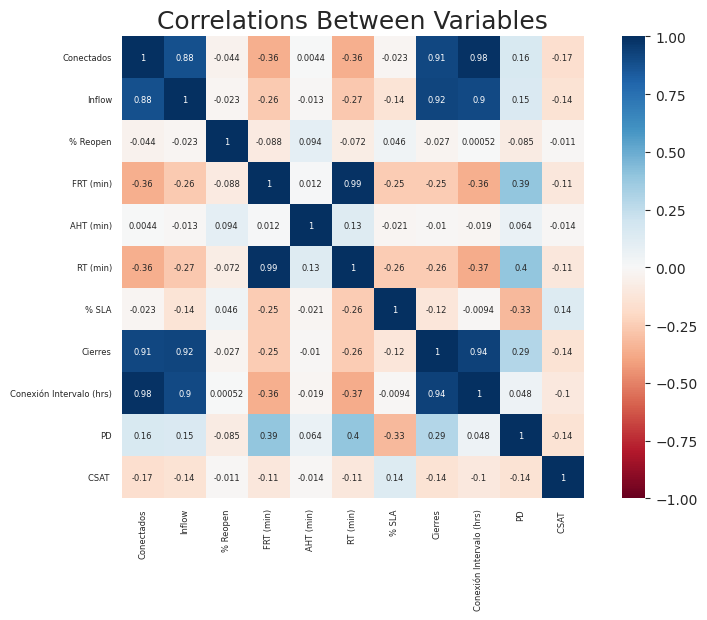

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, square=True, cmap='RdBu', vmax=1, vmin=-1, annot_kws={"size": 6})
plt.title('Correlations Between Variables', size=18)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

Existe una elevada correlación entre las variables Conectados e Inflow que es de 0.88, por su parte, la correlación entre las variables Cierres y Conectados es de 0.91, la correlación entre las variables Conexión Intervalo (hrs) y Conectados es 0.98, la correlación entre las variables Cierres e Inflow es 0.92, la correlación entre las variables Conexión Intervalo (hrs) e Inflow es 0.9, la correlación entre las variables RT (min) y FRT (min) es 0.99, la correlación entre Conexión Intervalo (hrs) y Cierres es 0.94. Esas son las correlaciones más fuertes positivas.
Ahora, las correlaciones más fuertes negativas son: la correlación entre Conectados y RT (min) es -0.36, la correlación entre Conectados y FRT (min) es -0.36 (lo que era de esperar dada la alta correlación entre RT (min) y FRT (min)), la correlación entre FTM (min) y Conexión Intervalo (hrs) es -0.36, la correlación entre RT (min) y Conectados es -0.36, la correlación entre RT (min) y Conexión Intervalo (hrs) es -0.37, la correlación entre % SLA  y PD es -0.33.

Es necesario considerar que analizar la correlación entre las variables en un conjunto de datos nos puede proporcionar una comprensión intuitiva de las relaciones entre las diferentes medidas. Sin embargo, es importante recordar que la correlación no implica causalidad.

Conectados e Inflow (0.88): Esto indica que a medida que aumenta el número de agentes conectados, también aumenta el inflow de interacciones. Esto tiene sentido ya que más agentes pueden manejar un mayor volumen de interacciones entrantes.

Cierres y Conectados (0.91): Similarmente, una mayor cantidad de agentes conectados permite cerrar un mayor número de casos. Esto es de esperarse ya que más agentes disponibles pueden gestionar más casos.

Conexión Intervalo (hrs) y Conectados (0.98): Esta correlación alta es lógica, ya que cuanto más tiempo estén conectados los agentes, más agentes se considerarán conectados.

Cierres e Inflow (0.92): Un mayor número de interacciones entrantes generalmente conduce a un mayor número de casos cerrados, siempre que los recursos sean suficientes para manejar el inflow.

Conexión Intervalo (hrs) e Inflow (0.9): Si los agentes están disponibles durante más horas, pueden manejar un mayor inflow de interacciones.

RT (min) y FRT (min) (0.99): Estos dos tiempos suelen estar altamente correlacionados ya que, en general, cuanto más tiempo se tarda en responder por primera vez a una interacción, más tiempo se tardará en resolverla.

Conexión Intervalo (hrs) y Cierres (0.94): Más tiempo de conexión permite cerrar más casos, ya que hay más tiempo para tratar con los clientes.

Por su parte, las correlaciones negativas se podrían interpretar así:

Conectados y RT (min) (-0.36), Conectados y FRT (min) (-0.36), Conexión Intervalo (hrs) y RT (min) (-0.37): Estas correlaciones sugieren que tener más agentes conectados o tener un mayor tiempo de conexión reduce el tiempo necesario para responder y resolver interacciones. Esto es razonable ya que más recursos disponibles pueden disminuir los tiempos de espera y resolución.

% SLA y PD (-0.33): Esto podría sugerir que un mayor porcentaje de acuerdos de nivel de servicio (SLA) cumplidos está asociado con menos casos cerrados en un intervalo de tiempo determinado. Esto podría ser debido a que cumplir con los SLAs requiere tiempo y esfuerzo, lo que podría reducir la cantidad de casos que se pueden cerrar en un periodo dado.


###**Estrategias para mejorar los indicadores**

Uno de los mayores impulsores de la satisfacción del cliente (CSAT) es la habilidad del agente para resolver consultas de manera eficiente y efectiva. Se podría mejorar CSAT invirtiendo en capacitación para los agentes, enfocándose en habilidades clave como la comunicación, la resolución de problemas y el conocimiento del producto o servicio. Esto también podría reducir el tiempo de resolución (RT) y el tiempo medio operativo (AHT), ya que los agentes mejor capacitados podrían resolver consultas más rápidamente.

Se observa que hay una alta correlación entre el tiempo de respuesta promedio (FRT) y el tiempo de resolución (RT). Por lo tanto, reducir el FRT podría conducir a una disminución en RT. Esto se puede lograr a través de la implementación de herramientas de automatización que proporcionen respuestas inmediatas a consultas frecuentes o mediante la implementación de chatbots para manejar consultas de más bajo nivel.

El tiempo que los agentes pasan conectados (Conexión Intervalo) está positivamente correlacionado con el número de cierres. Maximizar este tiempo puede permitir que más casos se resuelvan. Sin embargo, es importante equilibrar esto con la necesidad de evitar el agotamiento del agente y mantener un alto nivel de calidad del servicio. Esto se puede hacer a través de horarios de trabajo flexibles, turnos rotativos, o incluso la contratación de más personal si es necesario.




Antes de evaluar el modelo, quisiera revisar la relación entre las horas y algunas variables que considero importantes.

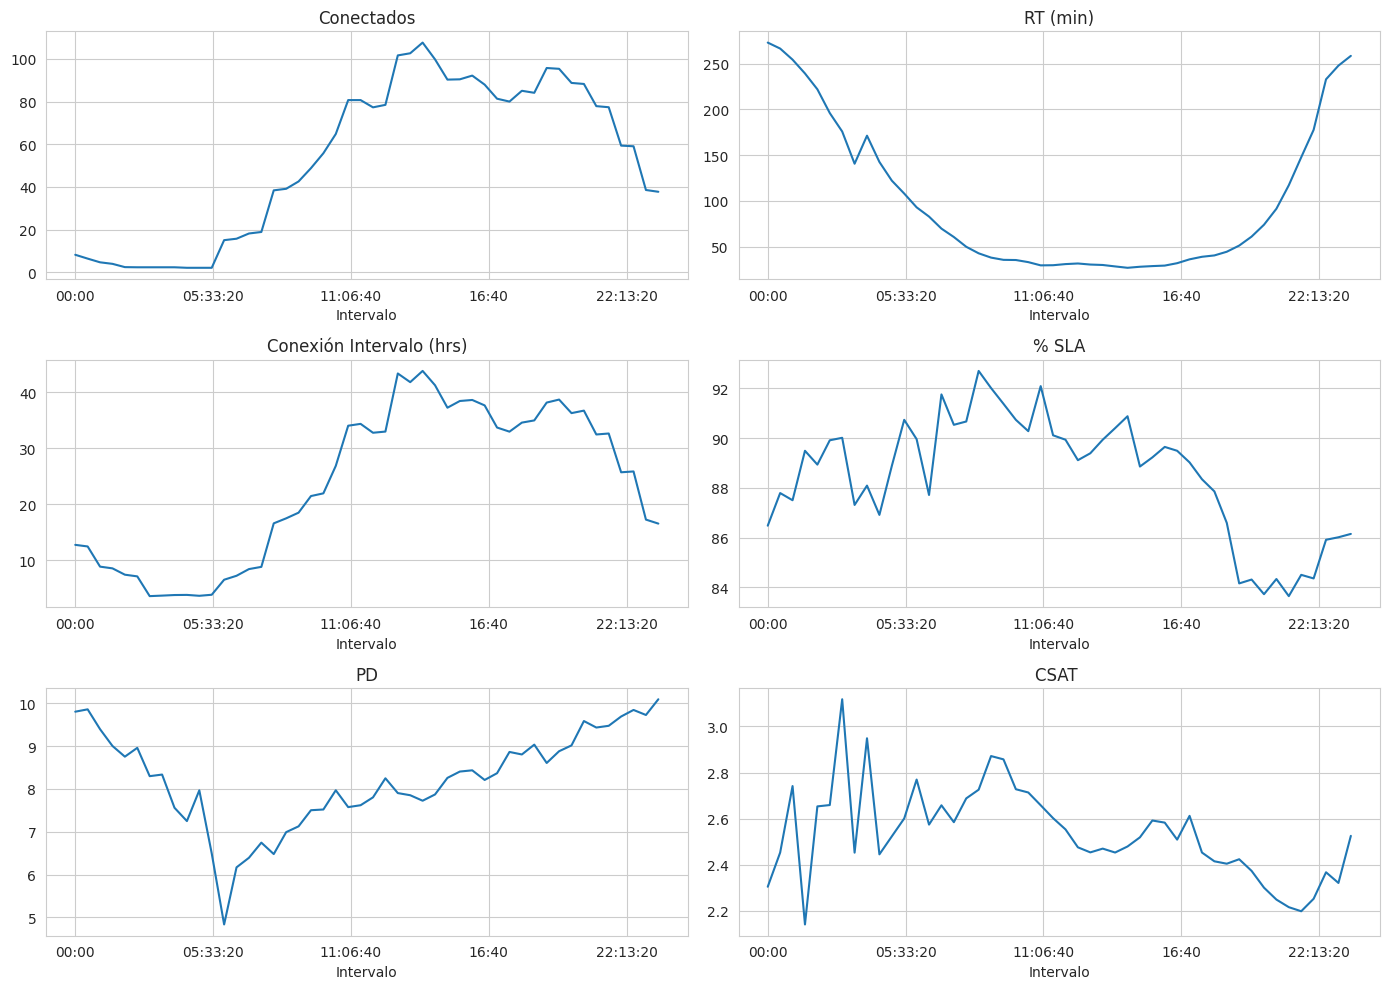

In [11]:
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# Agrupar los datos por la hora del día y obtener el promedio de cada variable
data_grouped_by_hour_Conectados = data.groupby('Intervalo')['Conectados'].mean()
data_grouped_by_hour_RT = data.groupby('Intervalo')['RT (min)'].mean()
data_grouped_by_hour_Conexion = data.groupby('Intervalo')['Conexión Intervalo (hrs)'].mean()
data_grouped_by_hour_SLA = data.groupby('Intervalo')['% SLA'].mean()
data_grouped_by_hour_PD = data.groupby('Intervalo')['PD'].mean()
data_grouped_by_hour_CSAT = data.groupby('Intervalo')['CSAT '].mean()

# Agregar los gráficos a la malla de gráficos
data_grouped_by_hour_Conectados.plot(ax=axs[0, 0], kind='line')
axs[0, 0].set_title('Conectados')
data_grouped_by_hour_RT.plot(ax=axs[0, 1], kind='line')
axs[0, 1].set_title('RT (min)')
data_grouped_by_hour_Conexion.plot(ax=axs[1, 0], kind='line')
axs[1, 0].set_title('Conexión Intervalo (hrs)')
data_grouped_by_hour_SLA.plot(ax=axs[1, 1], kind='line')
axs[1, 1].set_title('% SLA')
data_grouped_by_hour_PD.plot(ax=axs[2, 0], kind='line')
axs[2, 0].set_title('PD')
data_grouped_by_hour_CSAT.plot(ax=axs[2, 1], kind='line')
axs[2, 1].set_title('CSAT ')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()


Recordemos que existe una correlación negativa entre Conectados y RT (min), la cual se puede observar en la gráfica. Se observa que entre 7:22 am y las 11:06 am se da un crecimiento exponencial en el número de Conectados llegando a su pico máximo cerca de las 2:00 pm. Comportamiento similar tiene la variable Conexión Intervalo (hrs) dada su elevada correlación. Por su parte, se observa que el tiempo de resolución en minutos cae drásticamente a medida que aumenta la cantidad de conectados llegando a niveles valle entre las 9:14 pm y las 6:34 pm, quizás por la mayor disponibilidad de agentes conectados. La cantidad de casos que se cierran por intervalo tiende a crecer con la mayor disponibilidad de agentes, sin embargo, es curioso que aún a altas horas de la noche cuando la cantidad de conectados es menor, la cantidad de casos cerrados siga siendo tan elevada. El comportamiento de la CSAT es un poco más caótico pues no tiene una tendencia estable sin embargo, se observa que decrece levemente entre las 6:14 am hasta las 10:13 pm y repunta hacia la media noche.

Antes de empezar a realizar los modelos es necesario puntualizar algo. Para el día 1 se pide la predicción del CSAT dadas las variables SLA, Reopen, FRT, RT, PD y AHT, para el Día 2 se pide predecir el CSAT dadas las variables SLA, Reopen, FRT, Cierres y AHT, se pide además en estos días encontrar los valores que hacen máximo el CSAT. Por su parte, para el día 3 se pide predecir el SLA dados el Inflow, FRT, AHT y CSAT. Como son subconjuntos de variables diferentes para cada día entonces para cada día se elaborará un modelo diferente. Para el día 1 se realizará el modelo con mucho detalle y el ganador de los cuatro modelos para el día 1 se utilizará para los días 2 y 3 con las respectivas variables.

##**Modelo - Día 1**

Para el modelo se utilizaran las variables SLA, Reopen, FRT, RT, PD y AHT como variables independientes y la variable respuesta será CSAT. Enfocaremos entonces el análisis en un nuevo dataframe conformado por dichas variables.

In [12]:
# Seleccione las columnas que desea en su nuevo dataframe
selected_columns = ['% Reopen', 'FRT (min)', 'RT (min)', '% SLA', 'PD', 'AHT (min)', 'CSAT ']

# Crea el nuevo dataframe
new_data = data[selected_columns]

# Imprime el nuevo dataframe para verificar que se ha creado correctamente
print(new_data.head())


   % Reopen   FRT (min)    RT (min)  % SLA         PD  AHT (min)     CSAT 
0     15.38  588.450000  597.771300   62.0   8.828775   9.181425  2.230769
1     20.34  568.300000  579.145183   73.0  12.875537   9.006758  1.500000
2     12.90  543.383333  550.398917   68.0  10.736127   6.140217  2.600000
3     17.86  514.525000  525.191200   82.0  10.152693  11.819308  1.333333
4     21.74  371.550000  502.180417   78.0  11.498065  11.925717  2.571429


Obtenemos información de ese dataframe.

In [13]:
# Obtener información de los datos.
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   % Reopen   4243 non-null   float64
 1   FRT (min)  4315 non-null   float64
 2   RT (min)   4315 non-null   float64
 3   % SLA      4319 non-null   float64
 4   PD         4314 non-null   float64
 5   AHT (min)  4312 non-null   float64
 6   CSAT       4255 non-null   float64
dtypes: float64(7)
memory usage: 236.5 KB


Para las variables FRT, RT, SLA, PD, AHT la cantidad de missing values es de 0.15% en promedio lo que podría considerarse irrelevante para la pérdida de datos, por su parte Reopen y CSAT tienen en promedio 1,7% de missing values que también podría considerarse una proporción no significativa, por tanto, en vez de realizar imputación de datos utilizando mediana o interpolación, se eliminan todos aquellos registros que no estén completos.

In [14]:
# Elimina filas con valores NaN
new_data = new_data.dropna()

# Obtener información de los datos.
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 0 to 4321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   % Reopen   4171 non-null   float64
 1   FRT (min)  4171 non-null   float64
 2   RT (min)   4171 non-null   float64
 3   % SLA      4171 non-null   float64
 4   PD         4171 non-null   float64
 5   AHT (min)  4171 non-null   float64
 6   CSAT       4171 non-null   float64
dtypes: float64(7)
memory usage: 260.7 KB


Queda un nuevo dataframe con 4171 registros.

###**Preparación de datos**

En la limpieza de datos ya se hicieron algunos ajustes al dataset para no tener inconveniente al momento de utilizar algún modelo predictivo, sin embargo, vamos a revisar los valores atípicos.

In [15]:
# Crear un diccionario vacío para almacenar el conteo de outliers por columna
outliers_dict = {}

# Iterar a través de cada columna del dataframe
for col in new_data.columns:

    # Calcular Q1, Q3 y el IQR
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los valores atípicos
    outliers = new_data[(new_data[col] < lower_bound) | (new_data[col] > upper_bound)]

    # Agregar la cuenta de outliers al diccionario
    outliers_dict[col] = len(outliers)

# Imprimir el conteo de outliers por cada columna
print(outliers_dict)


{'% Reopen': 8, 'FRT (min)': 464, 'RT (min)': 461, '% SLA': 38, 'PD': 278, 'AHT (min)': 130, 'CSAT ': 414}


Si se miran los porcentajes de outliers en cada variable con respecto al total de los registros, vemos que:

% Reopen: 8 / 4171 = 0.19%

FRT (min): 464 / 4171 = 11.1%

RT (min): 461 / 4171 = 11.05%

% SLA: 38 / 4171 = 0.91%

PD: 278 / 4171 = 6.66%

AHT (min): 130 / 4171 = 3.11%

CSAT: 414 / 4171 = 9.92%

El porcentaje de outliers para '% Reopen' y '% SLA' es bajo, por lo que no deberían representar un gran problema.

En cambio, para 'FRT (min)', 'RT (min)', 'PD', 'AHT (min)' y 'CSAT', los porcentajes son mayores. Esto podría ser indicativo de que existen efectivamente algunos registros que se desvían considerablemente de la norma. Sin embargo, antes de tomar una decisión de eliminar estos registros, sería importante investigar un poco más para entender por qué están presentes estos outliers. ¿Es posible que estos registros representen situaciones o casos extremos pero legítimos en los datos? Si ese es el caso, puede ser que eliminemos estos registros, ya que podrían contener información valiosa.

Para esto vamos a evaluar los boxplot de las variables con mayor cantidad de outliers:

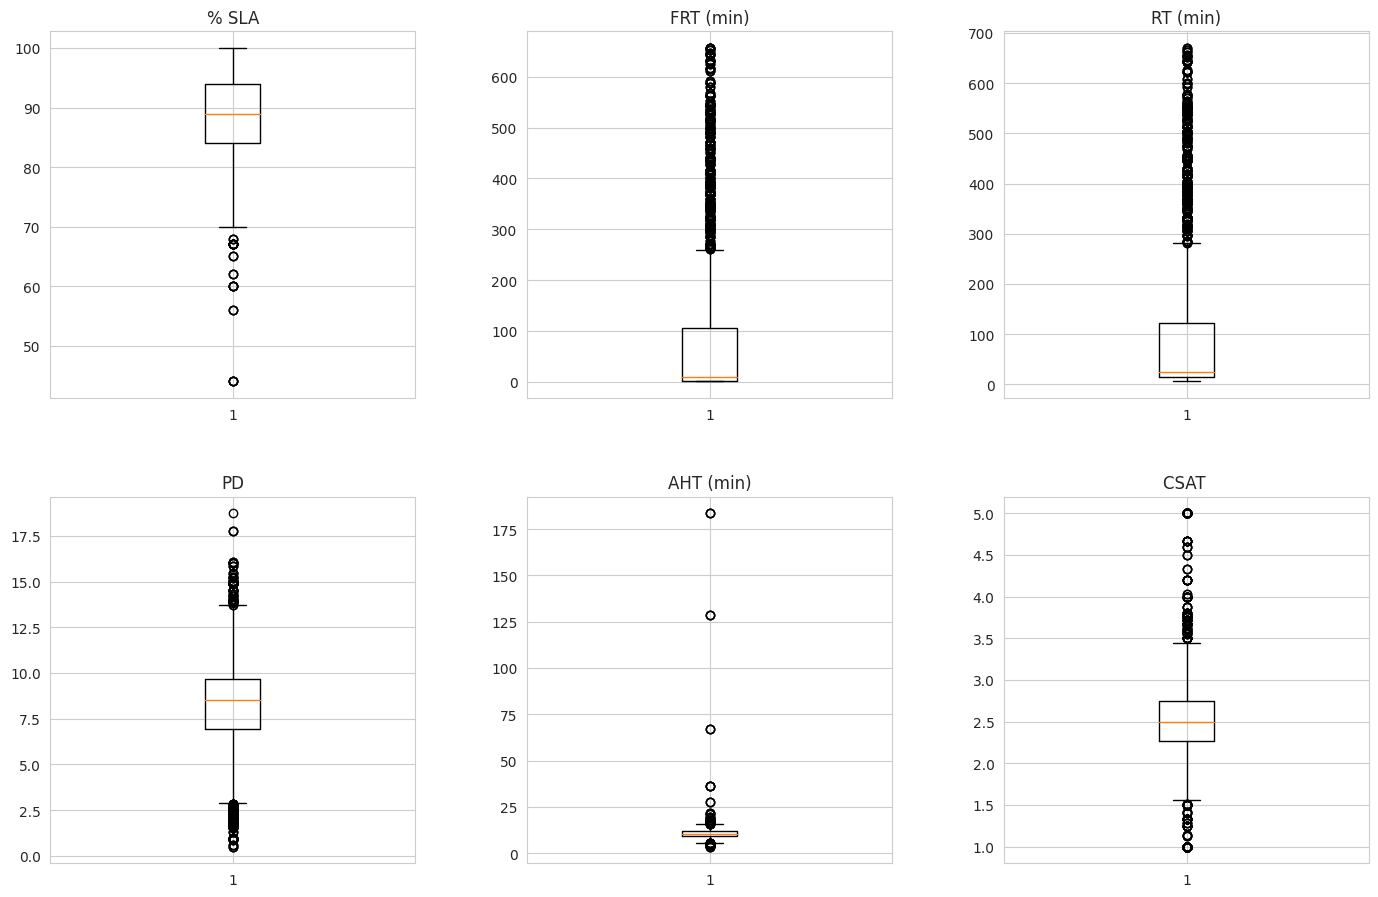

In [16]:
# Lista de las columnas que queremos visualizar
cols = ['% SLA', 'FRT (min)', 'RT (min)', 'PD', 'AHT (min)', 'CSAT ']

# Crear una nueva figura y un conjunto de subtramas
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Ajustar automáticamente el espaciado de subparcela
plt.tight_layout(pad=5.0)

# Para cada subparcela, crear un boxplot de una columna
for i in range(2):
    for j in range(3):
        ax[i, j].boxplot(new_data[cols[i*3 + j]].dropna())
        ax[i, j].set_title(cols[i*3 + j])

# Mostrar la figura
plt.show()


Se observa que efectivamente existe una buena cantidad de outliers en FRT (min) y RT (min) además de CSAT. Desde el inicio se observó alta variabilidad en el tiempo de resolución y el tiempo de respuesta medio, la presencia de outliers de estas dos variables se puede explicar por que algunas consultas de los clientes pueden ser más complejas que otras y, por lo tanto, tomar más tiempo para resolver. Por ejemplo, un problema de facturación podría ser más rápido de resolver que un problema técnico. Por lo tanto, la variabilidad en la complejidad de las consultas puede dar lugar a una gran cantidad de valores atípicos. O si hay ineficiencias en los procesos de resolución de consultas, esto podría resultar en tiempos de resolución y respuesta más largos. Por ejemplo, si los agentes tienen que pasar por varios pasos innecesarios para resolver una consulta, esto podría resultar en un aumento del tiempo de resolución y por lo tanto en valores atípicos. También puede ser que los agentes pueden tener diferentes niveles de habilidades y experiencia. Los agentes más experimentados pueden ser capaces de resolver consultas más rápidamente, mientras que los agentes menos experimentados pueden tardar más tiempo. Y desde el punto de vista estadístico, dado el sesgo en la distribución de las medidas de tiempo, es decir, con una cola larga hacia la derecha. En este caso, es común que haya valores muy altos que se consideran atípicos.

Por su parte, en la puntuación de satisfacción del cliente (CSAT) puede existir la presencia de outliers debido a que algunos clientes pueden haber tenido experiencias extremadamente positivas o negativas con el servicio al cliente. Esto puede hacer que proporcionen puntuaciones de CSAT que se desvíen significativamente, entre otras razones.

Por lo expuesto anteriormente se creería que los valores atípicos de las variables tienen significancia de negocio por lo que aportarían información valiosa a la hora de realizar un modelo y se busca que éste capture dicha información, sin embargo, al momento de realizar el ajuste, estos outliers jugaron en contra debido a que los resultados de las métricas de error fueron elevados y el ajuste bajo, por tanto, más adelante se eliminan los registros que tienen outliers.

###**Reducción de dimensionalidad**

Dado que la cantidad de variables no es muy grande, no usaremos PCA, ni LDA, ni otras técnicas para reducir la dimensionalidad, en cambio, recordemos que RT (min) y FRT (min) tienen una elevada correlación por lo que existe multicolinealidad que debe ser eliminada para el modelo de regresión. Por tanto se elimina la variable FRT (min).

In [17]:
# Selecciona las columnas que desea el nuevo dataframe
selected_columns = ['% Reopen', 'RT (min)', '% SLA', 'PD', 'AHT (min)', 'CSAT ']

# Crea el nuevo dataframe
reduced_data = new_data[selected_columns]

# Imprime el nuevo dataframe para verificar que se ha creado correctamente
print(reduced_data.head())

   % Reopen    RT (min)  % SLA         PD  AHT (min)     CSAT 
0     15.38  597.771300   62.0   8.828775   9.181425  2.230769
1     20.34  579.145183   73.0  12.875537   9.006758  1.500000
2     12.90  550.398917   68.0  10.736127   6.140217  2.600000
3     17.86  525.191200   82.0  10.152693  11.819308  1.333333
4     21.74  502.180417   78.0  11.498065  11.925717  2.571429


Luego de retirar la variable FRT (min), se procede a retirar los outliers por demostrarse que interfieren negativamente en las métricas de evaluación de la regresión.

In [18]:
# Función para identificar outliers usando IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Iniciar una serie de pandas con valores False
outliers = pd.Series(data=False, index=reduced_data.index)

# Identificar outliers en cada columna y actualizar la serie de pandas
for column in selected_columns:
    outliers = outliers | identify_outliers(reduced_data, column)

# Eliminar los registros con outliers
reduced_data = reduced_data[~outliers]

reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 0 to 4321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   % Reopen   4171 non-null   float64
 1   FRT (min)  4171 non-null   float64
 2   RT (min)   4171 non-null   float64
 3   % SLA      4171 non-null   float64
 4   PD         4171 non-null   float64
 5   AHT (min)  4171 non-null   float64
 6   CSAT       4171 non-null   float64
dtypes: float64(7)
memory usage: 260.7 KB


###**Modelos**

Se decide ajustar cuatro modelos para evaluar cual es mejor, inicialmente una regresión lineal, luego decision tree para regresión, random forest para regresion y una red neuronal.

####**Regresión rigde**

Primero, se definen las columnas que se utilizarán como características para predecir la variable objetivo 'CSAT '. Luego, los datos se dividen en conjuntos de entrenamiento y prueba. A continuación, se crea un modelo Ridge inicial, que es una versión regularizada del modelo de regresión lineal. Se define una cuadrícula de parámetros para el hiperparámetro 'alpha' del modelo Ridge, y se realiza una búsqueda de cuadrícula con validación cruzada para encontrar el valor óptimo de 'alpha' que minimiza el error cuadrático medio. Una vez encontrado el mejor parámetro, se vuelve a entrenar el modelo con este y se hacen predicciones en el conjunto de prueba. Finalmente, se calculan y se muestran varias métricas de error para evaluar el rendimiento del modelo en el conjunto de prueba.

In [19]:
# Lista de columnas de características
feature_columns = ['% Reopen', 'RT (min)', '% SLA', 'PD', 'AHT (min)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = reduced_data[feature_columns]
y = reduced_data['CSAT ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Ridge()

# Definir la grilla de parámetros para buscar
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Configurar la búsqueda de la grilla
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

# Realizar la búsqueda de la grilla
grid_search.fit(X_train, y_train)

# Imprimir el mejor parámetro
print(f'Best parameter: {grid_search.best_params_}')

# Crear y entrenar el modelo con el mejor parámetro
best_model = Ridge(alpha=grid_search.best_params_['alpha'])
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


Best parameter: {'alpha': 20}
MSE: 0.08757422362463749
MAE: 0.22967994609152526
R^2: 0.10111721949520913


Best parameter: {'alpha': 20}: Durante la optimización de hiperparámetros utilizando la búsqueda de cuadrícula, el mejor valor para el hiperparámetro de regularización "alpha" en el modelo de regresión Ridge resultó ser 20. Esto significa que este es el valor que minimiza el error cuadrático medio en el conjunto de validación cruzada.

MSE: 0.08757422362463749: El Error Cuadrático Medio o MSE, entre las predicciones del modelo y los valores verdaderos en el conjunto de prueba es aproximadamente 0.088.

MAE: 0.22967994609152526: El Error Absoluto Medio (MAE) entre las predicciones del modelo y los valores verdaderos en el conjunto de prueba es aproximadamente 0.230.

R^2: 0.10111721949520913: El coeficiente de determinación R^2 del modelo en el conjunto de prueba es aproximadamente 0.101. Este valor indica que el modelo explica aproximadamente el 10.1% de la variabilidad en la variable objetivo, que en este caso es 'CSAT '. Aunque esta medida puede variar entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste del modelo, un R^2 de 0.101 es bastante bajo, lo que sugiere que el modelo no se ajusta muy bien a los datos.

####**Arból de decisión**

Se implementa un Árbol de Decisión para regresión, optimizado a través de una búsqueda de cuadrícula (grid search) para encontrar los mejores hiperparámetros. Primero, selecciona un conjunto de características y divide los datos en conjuntos de entrenamiento y prueba. Luego, se crea una instancia del modelo de Árbol de Decisión. Se define un conjunto de parámetros para la búsqueda de cuadrícula, específicamente, diferentes valores para la profundidad máxima del árbol ("max_depth") y el número mínimo de muestras requeridas para dividir un nodo interno ("min_samples_split"). Utiliza la búsqueda de cuadrícula para encontrar la combinación de parámetros que minimiza el error cuadrático medio (MSE) en validación cruzada. Entrena un nuevo Árbol de Decisión con los mejores parámetros encontrados, y finalmente, evalúa el rendimiento del modelo en el conjunto de prueba, calculando el MSE, el error absoluto medio (MAE), y el coeficiente de determinación R^2.

In [25]:
# Lista de columnas de características
feature_columns = ['% Reopen', 'RT (min)', '% SLA', 'PD', 'AHT (min)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = reduced_data[feature_columns]
y = reduced_data['CSAT ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = DecisionTreeRegressor(random_state=42)

# Definir la grilla de parámetros para buscar
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11)}

# Configurar la búsqueda de la grilla
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

# Realizar la búsqueda de la grilla
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f'Best parameters: {grid_search.best_params_}')

# Crear y entrenar el modelo con los mejores parámetros
best_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')


Best parameters: {'max_depth': 10, 'min_samples_split': 2}
MSE: 0.05222926045511462
MAE: 0.15839783973392005
R^2: 0.46390637657455236


Los resultados indican que el mejor modelo de Árbol de Decisión encontrado por la búsqueda de cuadrícula tiene una profundidad máxima ('max_depth') de 10 y requiere al menos 2 muestras para dividir un nodo interno ('min_samples_split').

Se obtiene un MSE de 0.0522 y un MAE de 0.1584 lo que indica un mejor desempeño que el modelo de regresión. El coeficiente de determinación (R^2) es 0.4639. Este valor indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R^2 de 1 indica que el modelo puede explicar toda la variabilidad de la variable de respuesta en torno a su media. Un R^2 de 0.4639 sugiere que el modelo puede explicar alrededor del 46.39% de la variabilidad en 'CSAT', lo que indica un rendimiento moderado.

Como este modelo resulto siendo el mejor vamos a predecir el día 1 con los valores indicados.

In [26]:
# Los valores para predecir
test_values = [[10, 8.5, 80, 7, 8]]

# Realizar la predicción con los valores de prueba
prediction = best_model.predict(test_values)

print(f'La predicción del modelo para los valores de entrada es: {prediction[0]}')


La predicción del modelo para los valores de entrada es: 2.5


Ahora, con este modelo, encontraremos los valores de las variables que permiten obtener el máximo CSAT.

In [28]:
# Definir los rangos de cada variable de entrada
ranges = {
    '% Reopen': (0, 62),
    'RT (min)': (0, 750),
    '% SLA': (36, 100),
    'PD': (0, 24),
    'AHT (min)': (0, 550)
}

# Generar 1,000,000 de muestras aleatorias dentro de los rangos definidos
samples = pd.DataFrame({k: np.random.uniform(low=low, high=high, size=1000000) for k, (low, high) in ranges.items()})

# Hacer la predicción para cada muestra
predictions = best_model.predict(samples)

# Encontrar la muestra que da la predicción más alta
best_index = np.argmax(predictions)
best_sample = samples.iloc[best_index]
best_CSAT = predictions[best_index]

print(f'Los valores de las variables que maximizan CSAT son:\n{best_sample}')
print(f'El valor máximo de CSAT es: {best_CSAT}')


Los valores de las variables que maximizan CSAT son:
% Reopen      35.246266
RT (min)     257.945210
% SLA         85.383905
PD            17.282599
AHT (min)      1.228346
Name: 242, dtype: float64
El valor máximo de CSAT es: 3.444444444


####**Random forest**

Se entrena y evalúa un modelo de regresión utilizando el algoritmo de Bosques Aleatorios (Random Forest). Primero, selecciona un conjunto de características y el objetivo a predecir. Luego, divide los datos en conjuntos de entrenamiento y prueba.
Se crea un objeto del modelo RandomForestRegressor y se configura una búsqueda de cuadrícula (GridSearchCV) para optimizar los parámetros del modelo. Los parámetros a optimizar son el número de árboles en el bosque (n_estimators), la profundidad máxima de los árboles (max_depth) y el número mínimo de muestras requerido para dividir un nodo interno (min_samples_split). Para acelerar el proceso de búsqueda de cuadrícula, se reducen los rangos de estos parámetros.
Después de encontrar los mejores parámetros con la búsqueda de cuadrícula, se entrena un nuevo modelo de Bosques Aleatorios con estos parámetros en el conjunto de entrenamiento.

In [21]:
# Lista de columnas de características
feature_columns = ['% Reopen', 'RT (min)', '% SLA', 'PD', 'AHT (min)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = reduced_data[feature_columns]
y = reduced_data['CSAT ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = RandomForestRegressor(random_state=42)

# Definir la grilla de parámetros para buscar
parameters = {'n_estimators': [100, 200],  # Reducir el número de estimadores
              'max_depth': range(1, 6),  # Reducir la profundidad máxima
              'min_samples_split': range(2, 6)}  # Reducir el rango de min_samples_split

# Configurar la búsqueda de la grilla
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Realizar la búsqueda de la grilla
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f'Best parameters: {grid_search.best_params_}')

# Crear y entrenar el modelo con los mejores parámetros
best_model = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')



Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
MSE: 0.06696793430285213
MAE: 0.2044296649995842
R^2: 0.31262510246365816


Los resultados obtenidos representan el rendimiento del modelo de regresión de bosques aleatorios (Random Forest) en los datos de prueba, utilizando los parámetros óptimos encontrados mediante la búsqueda de cuadrícula (GridSearchCV).

Los "mejores parámetros" son aquellos que minimizan el error cuadrático medio (MSE) en la validación cruzada durante la búsqueda de cuadrícula. En este caso, los mejores parámetros fueron una profundidad máxima de los árboles de 5 (max_depth), un número mínimo de muestras requerido para dividir un nodo interno de 2 (min_samples_split) y un número de árboles en el bosque de 200 (n_estimators).

El error cuadrático medio (MSE) en los datos de prueba fue de aproximadamente 0.067. El error absoluto medio (MAE) en los datos de prueba fue de aproximadamente 0.204. El coeficiente de determinación (R^2) en los datos de prueba fue de aproximadamente 0.313. El modelo puede explicar aproximadamente el 31.3% de la variabilidad en los datos de prueba.

####**Red neuronal profunda**

Se usa el módulo keras-tuner para realizar una búsqueda aleatoria de hiperparámetros y optimizar un modelo de redes neuronales profundas (deep learning) utilizando Keras y TensorFlow.

Primero, el código establece las columnas de características que se usarán y divide los datos en conjuntos de entrenamiento y prueba. Luego, se escalan las características para asegurar que todas estén en la misma escala, lo cual es especialmente importante para los algoritmos de aprendizaje automático que se basan en la distancia entre las características, como las redes neuronales.
Se define una función build_model(hp) para construir un modelo de red neuronal secuencial, cuyo número de capas, unidades por capa y tasa de aprendizaje son definidos por un objeto hp, que es proporcionado por keras-tuner. Este objeto permite definir rangos de valores para los hiperparámetros, y keras-tuner buscará la mejor combinación de hiperparámetros dentro de estos rangos.
Se instancia un objeto RandomSearch de keras-tuner, que realizará una búsqueda aleatoria de hiperparámetros utilizando la función build_model(hp) y optimizará el modelo para minimizar el error cuadrático medio en los datos de validación. Se realiza un número máximo de 5 pruebas de diferentes combinaciones de hiperparámetros, y cada prueba se ejecuta 3 veces para obtener un promedio.
Una vez finalizada la búsqueda, se obtiene el mejor modelo, se entrena con los datos de entrenamiento durante 50 épocas, se realizan predicciones en los datos de prueba y se calcula el error cuadrático medio de estas predicciones.


In [24]:
# Lista de columnas de características
feature_columns = ['% Reopen', 'RT (min)', '% SLA', 'PD', 'AHT (min)']

# Intentar dividir los datos en conjuntos de entrenamiento y prueba
try:
    X = reduced_data[feature_columns]
    y = reduced_data['CSAT ']
except KeyError as e:
    print(f"La clave {e} no se encuentra en el DataFrame.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Intentar estandarizar las características
try:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
except Exception as e:
    print(f"Error al escalar los datos: {e}")

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dropout(0.1))  # Agregando Dropout
    model.add(layers.Dense(1, activation='linear'))  # Cambiando la función de activación a 'linear'
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Entrenar el modelo
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)  # Utilizando función predefinida para calcular MSE
print(f'MSE: {mse}')


Epoch 1/50
81/81 [==============================] - 6s 41ms/step - loss: 0.1290 - mean_squared_error: 0.1290 - val_loss: 0.0965 - val_mean_squared_error: 0.0965
Epoch 2/50
81/81 [==============================] - 4s 45ms/step - loss: 0.1222 - mean_squared_error: 0.1222 - val_loss: 0.0951 - val_mean_squared_error: 0.0951
Epoch 3/50
81/81 [==============================] - 3s 42ms/step - loss: 0.1249 - mean_squared_error: 0.1249 - val_loss: 0.0877 - val_mean_squared_error: 0.0877
Epoch 4/50
81/81 [==============================] - 3s 37ms/step - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.1052 - val_mean_squared_error: 0.1052
Epoch 5/50
81/81 [==============================] - 3s 37ms/step - loss: 0.1236 - mean_squared_error: 0.1236 - val_loss: 0.0996 - val_mean_squared_error: 0.0996
Epoch 6/50
81/81 [==============================] - 3s 38ms/step - loss: 0.1306 - mean_squared_error: 0.1306 - val_loss: 0.1388 - val_mean_squared_error: 0.1388
Epoch 7/50
81/81 [================

Los resultados sugieren que el modelo tiene un rendimiento razonablemente bueno con un error cuadrático medio de 0.09477 en el conjunto de validación en su mejor intento. Sin embargo, hay cierta variación en el rendimiento a lo largo de las épocas, lo que indica que el modelo puede estar sobreajustándose o subajustándose a los datos en diversas épocas.

####**Conclusiones de los modelos**

El Árbol de Decisión tiene el menor Mean Squared Error (MSE) de 0.05222926045511462 que indica que el modelo de Árbol de Decisión en promedio se equivoca en un cuadrado de 0.052 en la predicción. Es decir, los errores de este modelo tienden a ser menores que los de los otros tres modelos.
Además, el Árbol de Decisión tiene el menor Mean Absolute Error (MAE) de 0.15839783973392005. El MAE es el promedio de los errores absolutos del modelo, lo que significa que el modelo de Árbol de Decisión se equivoca en promedio en 0.158 en sus predicciones.
El coeficiente de determinación R^2 del modelo de Árbol de Decisión es el más alto (0.46390637657455236) lo cual indica que este modelo puede explicar el 46.39% de la variación en los datos, lo cual es superior a los otros modelos.
Por lo tanto, con base en los resultados proporcionados, el modelo de Árbol de Decisión sería el mejor modelo entre los cuatro.

A título personal considero que si bien es el mejor modelo, aún está por debajo de ser un modelo aceptable. Quizás el modelo podría mejorarse aplicando ingeniería de características, ya sea aplicando transformaciones logarítmicas, o creando nuevas características, o realizando interacciones entre variables o transformando las variables en categóricas, sin embargo, todas estas transformaciones se deben decidir con un buen conocimiento de negocio pues algunas pueden no tener sentido o no mejorar el rendimiento de los modelos.


##**Modelo - Día 2**

Para el día 2 se realizará el mismo procedimiento que para el modelo del día 1, solo que se omitaran comentarios y explicaciones. En este punto no se elimina ninguna característica debido a que no existe correlación entre las mismas y se utiliza el Ärbol de decisión como modelo para predecir.

In [29]:
# Seleccione las columnas que desea en su nuevo dataframe
selected_columns = ['% Reopen', 'FRT (min)', 'Cierres', '% SLA', 'AHT (min)', 'CSAT ']

# Crea el nuevo dataframe
new_data = data[selected_columns]

# Imprime el nuevo dataframe para verificar que se ha creado correctamente
print(new_data.head())


   % Reopen   FRT (min)  Cierres  % SLA  AHT (min)     CSAT 
0     15.38  588.450000     66.0   62.0   9.181425  2.230769
1     20.34  568.300000    100.0   73.0   9.006758  1.500000
2     12.90  543.383333     79.0   68.0   6.140217  2.600000
3     17.86  514.525000     70.0   82.0  11.819308  1.333333
4     21.74  371.550000     52.0   78.0  11.925717  2.571429


In [30]:
# Obtener información de los datos.
new_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   % Reopen   4243 non-null   float64
 1   FRT (min)  4315 non-null   float64
 2   Cierres    4319 non-null   float64
 3   % SLA      4319 non-null   float64
 4   AHT (min)  4312 non-null   float64
 5   CSAT       4255 non-null   float64
dtypes: float64(6)
memory usage: 202.7 KB


In [31]:
# Elimina filas con valores NaN
new_data = new_data.dropna()

# Obtener información de los datos.
new_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4180 entries, 0 to 4321
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   % Reopen   4180 non-null   float64
 1   FRT (min)  4180 non-null   float64
 2   Cierres    4180 non-null   float64
 3   % SLA      4180 non-null   float64
 4   AHT (min)  4180 non-null   float64
 5   CSAT       4180 non-null   float64
dtypes: float64(6)
memory usage: 228.6 KB


In [32]:
# Crear un diccionario vacío para almacenar el conteo de outliers por columna
outliers_dict = {}

# Iterar a través de cada columna del dataframe
for col in new_data.columns:

    # Calcular Q1, Q3 y el IQR
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los valores atípicos
    outliers = new_data[(new_data[col] < lower_bound) | (new_data[col] > upper_bound)]

    # Agregar la cuenta de outliers al diccionario
    outliers_dict[col] = len(outliers)

# Imprimir el conteo de outliers por cada columna
print(outliers_dict)


{'% Reopen': 8, 'FRT (min)': 464, 'Cierres': 0, '% SLA': 38, 'AHT (min)': 133, 'CSAT ': 415}


In [33]:
reduced_data = new_data

In [34]:
# Función para identificar outliers usando IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Iniciar una serie de pandas con valores False
outliers = pd.Series(data=False, index=reduced_data.index)

# Identificar outliers en cada columna y actualizar la serie de pandas
for column in selected_columns:
    outliers = outliers | identify_outliers(reduced_data, column)

# Eliminar los registros con outliers
reduced_data = reduced_data[~outliers]

reduced_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319 entries, 12 to 4321
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   % Reopen   3319 non-null   float64
 1   FRT (min)  3319 non-null   float64
 2   Cierres    3319 non-null   float64
 3   % SLA      3319 non-null   float64
 4   AHT (min)  3319 non-null   float64
 5   CSAT       3319 non-null   float64
dtypes: float64(6)
memory usage: 181.5 KB


In [36]:
# Lista de columnas de características
feature_columns = ['% Reopen', 'FRT (min)', 'Cierres', '% SLA', 'AHT (min)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = reduced_data[feature_columns]
y = reduced_data['CSAT ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = DecisionTreeRegressor(random_state=42)

# Definir la grilla de parámetros para buscar
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11)}

# Configurar la búsqueda de la grilla
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

# Realizar la búsqueda de la grilla
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f'Best parameters: {grid_search.best_params_}')

# Crear y entrenar el modelo con los mejores parámetros
best_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

Best parameters: {'max_depth': 10, 'min_samples_split': 6}
MSE: 0.05272668926034171
MAE: 0.16048779517941356
R^2: 0.5149355231853043


Se tiene un MSE de 0.05272668926034171 y un MAE de 0.16048779517941356, además el coeficiente de determinación es 0.5149355231853043 lo que significa que el modelo explica aproximadamente el 51.49% de la variabilidad en los datos. Este valor es razonable, pero indica que todavía hay margen de mejora en el modelo. Sin embargo, explica un poco más que el modelo para el día 1.

In [39]:
# Los valores para predecir
test_values = [[12, 0.3, 5012, 95, 6]]

# Realizar la predicción con los valores de prueba
prediction = best_model.predict(test_values)

print(f'La predicción del modelo para los valores de entrada es: {prediction[0]}')

1/1 [==============================] - 0s 41ms/step
La predicción del modelo para los valores de entrada es: [2.5470262]


In [40]:
# Definir los rangos de cada variable de entrada
ranges = {
    '% Reopen': (0, 62),
    'FRT (min)': (0, 660),
    '% SLA': (36, 100),
    'Cierres': (0, 6000),
    'AHT (min)': (0, 550)
}

# Generar 1,000,000 de muestras aleatorias dentro de los rangos definidos
samples = pd.DataFrame({k: np.random.uniform(low=low, high=high, size=1000000) for k, (low, high) in ranges.items()})

# Hacer la predicción para cada muestra
predictions = best_model.predict(samples)

# Encontrar la muestra que da la predicción más alta
best_index = np.argmax(predictions)
best_sample = samples.iloc[best_index]
best_CSAT = predictions[best_index]

print(f'Los valores de las variables que maximizan CSAT son:\n{best_sample}')
print(f'El valor máximo de CSAT es: {best_CSAT}')


31250/31250 [==============================] - 118s 4ms/step
Los valores de las variables que maximizan CSAT son:
% Reopen       34.650984
FRT (min)     646.245764
% SLA          39.891340
Cierres      5361.755629
AHT (min)     118.764392
Name: 0, dtype: float64
El valor máximo de CSAT es: [2.5470266]


##**Modelo - Día 3**

Para el día 3 se realizará el mismo procedimiento que para el modelo del día 1, solo que se omitaran comentarios y explicaciones. En este punto no se elimina ninguna característica debido a que no existe correlación entre las mismas y se utiliza el Ärbol de decisión como modelo para predecir.

In [41]:
# Seleccione las columnas que desea en su nuevo dataframe
selected_columns = ['Inflow', 'FRT (min)', 'AHT (min)', 'CSAT ', '% SLA']

# Crea el nuevo dataframe
new_data = data[selected_columns]

# Imprime el nuevo dataframe para verificar que se ha creado correctamente
print(new_data.head())

   Inflow   FRT (min)  AHT (min)     CSAT   % SLA
0    91.0  588.450000   9.181425  2.230769   62.0
1    59.0  568.300000   9.006758  1.500000   73.0
2    31.0  543.383333   6.140217  2.600000   68.0
3    28.0  514.525000  11.819308  1.333333   82.0
4    23.0  371.550000  11.925717  2.571429   78.0


In [42]:
# Obtener información de los datos.
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Inflow     4319 non-null   float64
 1   FRT (min)  4315 non-null   float64
 2   AHT (min)  4312 non-null   float64
 3   CSAT       4255 non-null   float64
 4   % SLA      4319 non-null   float64
dtypes: float64(5)
memory usage: 169.0 KB


In [43]:
# Elimina filas con valores NaN
new_data = new_data.dropna()

# Obtener información de los datos.
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4246 entries, 0 to 4321
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Inflow     4246 non-null   float64
 1   FRT (min)  4246 non-null   float64
 2   AHT (min)  4246 non-null   float64
 3   CSAT       4246 non-null   float64
 4   % SLA      4246 non-null   float64
dtypes: float64(5)
memory usage: 199.0 KB


In [44]:
# Crear un diccionario vacío para almacenar el conteo de outliers por columna
outliers_dict = {}

# Iterar a través de cada columna del dataframe
for col in new_data.columns:

    # Calcular Q1, Q3 y el IQR
    Q1 = new_data[col].quantile(0.25)
    Q3 = new_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar los valores atípicos
    outliers = new_data[(new_data[col] < lower_bound) | (new_data[col] > upper_bound)]

    # Agregar la cuenta de outliers al diccionario
    outliers_dict[col] = len(outliers)

# Imprimir el conteo de outliers por cada columna
print(outliers_dict)


{'Inflow': 3, 'FRT (min)': 465, 'AHT (min)': 149, 'CSAT ': 460, '% SLA': 47}


In [46]:
reduced_data = new_data

In [47]:
# Función para identificar outliers usando IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Iniciar una serie de pandas con valores False
outliers = pd.Series(data=False, index=reduced_data.index)

# Identificar outliers en cada columna y actualizar la serie de pandas
for column in selected_columns:
    outliers = outliers | identify_outliers(reduced_data, column)

# Eliminar los registros con outliers
reduced_data = reduced_data[~outliers]

reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3341 entries, 12 to 4321
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Inflow     3341 non-null   float64
 1   FRT (min)  3341 non-null   float64
 2   AHT (min)  3341 non-null   float64
 3   CSAT       3341 non-null   float64
 4   % SLA      3341 non-null   float64
dtypes: float64(5)
memory usage: 156.6 KB


In [48]:
# Lista de columnas de características
feature_columns = ['Inflow', 'FRT (min)', 'AHT (min)', 'CSAT ']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = reduced_data[feature_columns]
y = reduced_data['% SLA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = DecisionTreeRegressor(random_state=42)

# Definir la grilla de parámetros para buscar
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11)}

# Configurar la búsqueda de la grilla
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)

# Realizar la búsqueda de la grilla
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f'Best parameters: {grid_search.best_params_}')

# Crear y entrenar el modelo con los mejores parámetros
best_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

Best parameters: {'max_depth': 10, 'min_samples_split': 3}
MSE: 6.595386279645318
MAE: 1.7223604968320472
R^2: 0.8167659169648003


Se tiene un MSE y MAE de 6.9554 y 1.7223 respectivamente, son errores muy grandes pues están muy lejanos del cero, sin embargo, puede deberse a la naturaleza de los datos. El coeficiente de determinación es de 81,7%, es decir, el modelo puede explicar el 81.7% de la variabilidad en los datos de prueba, lo que sugiere que el modelo tiene un buen ajuste a los datos.

In [49]:
# Los valores para predecir
test_values = [[8000, 2, 9, 2.67]]

# Realizar la predicción con los valores de prueba
prediction = best_model.predict(test_values)

print(f'La predicción del modelo para los valores de entrada es: {prediction[0]}')

La predicción del modelo para los valores de entrada es: 95.27272727272727


##**Ejercicio 2**

No todas las variables aportan el mismo nivel de importancia por eso no todas las variables hacen parte del análisis que se realizó, se escogieron algunas de las variables ya que por correlación, al escoger algunas, se intuye el comportamiento de las otras, además algunas pueden ser más relaventes para el análisis. En este caso, para el modelo de clusterización se busca encontrar los intervalos o subconjuntos de intervalos en los que CSAT, PD, SLA, Cierres tienen valores más altos y en los que % Reopen, RT (min), AHT (min) son más bajos. Esto es porque buscamos obtener intervalos donde la medición del cliente respecto a su experiencia es más alta, la cantidad de casos que se cerraron también es más alta, la medición del nivel de es también elevado y la cantidad de interacciones o casos que se cerraron es alta, pos su parte, se busca que la proporción de interacciones reabiertas sea baja, el tiempo de resolución sea bajo y el tiempo medio operativo sea bajo.
Para ello se evaluaron dos enfoques, uno con k-means utilizando el elbow method para encontrar el número óptimo de clusters y otro con k-shape pero con inercías y con el método de la silueta para encontrar el número óptimo de clusters


###**K-means**

Es uno de los algoritmos de agrupamiento más utilizados. Funciona bien con datos de alta dimensión y es eficiente desde el punto de vista computacional. Sin embargo, asume que los clusters son convexos y esféricos, lo que no siempre es el caso en los datos del mundo real. k-means utiliza la distancia euclidiana para calcular la distancia entre los puntos, lo que lo hace sensible a la magnitud de los datos.

K-means agrupa los datos en K grupos diferentes, donde K es un número especificado por uno como analista. Primero, el algoritmo selecciona K puntos de datos al azar para ser los "centroides" iniciales. Luego, cada punto de datos es asignado al centroide más cercano, formando así K grupos. El algoritmo entonces recalcula los centroides basándose en los puntos de datos que han sido asignados a cada grupo, y este proceso se repite hasta que los centroides no cambien significativamente.

La idea es ver la media de cada variable en cada cluster. Esto permitirá identificar qué clusters tienen los valores más altos y más bajos para cada variable. Paraa encontrar el mejor número de clusters se puede usar la prueba y error o utilizar otros métodos. En este caso usaremos el método del codo o Elbow Method.

Este método implica ejecutar el algoritmo de k-means para un rango de valores de k y luego graficar el Error Cuadrático Medio (ECM o WCSS en inglés) para cada valor de k. WCSS es una medida de cuánto varían los puntos de datos en relación con el centroide de su cluster. Cuando se grafica WCSS para diferentes valores de k, la línea que queda tiene la forma de un brazo y un codo. El "codo" es un buen indicador del número óptimo de clusters.

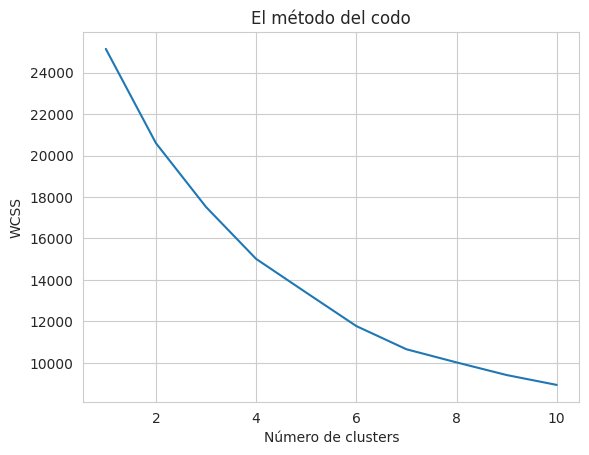

   Number of Clusters          WCSS
0                   1  25144.000000
1                   2  20599.731434
2                   3  17520.058501
3                   4  15015.785003
4                   5  13389.107601
5                   6  11775.919493
6                   7  10656.950417
7                   8  10023.269743
8                   9   9414.081416
9                  10   8937.020370


In [29]:
# Elimina filas con valores NaN
data = data.dropna()

data['Fecha_Intervalo'] = pd.to_datetime(data['Fecha'].dt.strftime('%Y-%m-%d') + ' ' + data['Intervalo'].astype(str))

# Ordenamos el DataFrame por esta nueva columna
data.sort_index(inplace=True)

# ['% Reopen', 'FRT (min)', 'AHT (min)', 'RT (min)', '% SLA', 'Conexión Intervalo (hrs)', 'PD', 'CSAT ']
# Creamos un subconjunto de nuestro DataFrame con las columnas de interés
variables = ['CSAT ', 'PD', '% SLA', 'Cierres', '% Reopen', 'RT (min)', 'AHT (min)']
data = data[variables]

# Escalamos nuestros datos para que tengan media 0 y varianza 1
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Usamos el método del codo para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('El método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

# Crear DataFrame a partir de los valores WCSS
elbow_df = pd.DataFrame({'Number of Clusters': range(1, 11), 'WCSS': wcss})

# Imprimir DataFrame
print(elbow_df)

Al analizar estos valores, se busca el punto donde la disminución de WCSS se vuelve menos pronunciada, es decir, donde se forma un "codo".

Mirando los datos no hay un punto obvio donde la disminución se vuelva sustancialmente más pequeña. Sin embargo, parece que la disminución entre 7 y 8 clusters (de 10656.950417 a 10023.269743) es menos pronunciada que los pasos anteriores, y después de 8 clusters, la disminución sigue siendo bastante constante (aunque sigue siendo bastante significativa). Por lo tanto, escogeré 7 clusters para trabajar.

In [31]:
num_clusters = 7

# Creamos y ajustamos nuestro modelo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

# Añadimos las etiquetas de los clusters a nuestro DataFrame original
data['Cluster'] = kmeans.labels_

# Agrupamos por cluster y calculamos la media de cada variable
cluster_summary = data.groupby('Cluster')[variables].mean()

print(cluster_summary)

            CSAT          PD      % SLA     Cierres   % Reopen    RT (min)  \
Cluster                                                                      
0        2.483602   8.570814  87.800937  275.826698   0.250771   50.135751   
1        2.338690   9.469079  82.679042  274.536527  20.257592   91.854794   
2        2.309569  10.026144  87.386861  132.624088  12.003602  459.930410   
3        2.578541   7.998970  91.969792  267.203125  22.650896   22.364070   
4        3.909083   6.507170  91.806931   58.797030  15.383576   72.008630   
5        3.000000   9.565117  96.000000   43.000000  59.935000  293.446296   
6        2.430165   4.339961  93.227957   48.550538  16.502395   31.520981   

          AHT (min)  
Cluster              
0         11.040329  
1         11.072020  
2         10.114928  
3         10.958511  
4          9.450855  
5        156.093758  
6          9.709332  


Ahora, podemos inferir algunas características generales de cada cluster:

Cluster 0
Este grupo tiene una calificación de satisfacción del cliente (CSAT) relativamente baja (2.48) y un porcentaje de resolución dentro del SLA moderado (87.8%). Tiene un alto número de cierres (275.83), un bajo porcentaje de reapertura (0.25%) y un tiempo de resolución (RT) y manejo (AHT) de las interacciones relativamente bajo. Esto puede indicar un equipo que maneja un alto volumen de interacciones con eficiencia, pero posiblemente a costa de la satisfacción del cliente.

Cluster 1
Este grupo presenta la calificación de satisfacción del cliente más baja (2.33) y el porcentaje de resolución dentro del SLA es el más bajo (82.67%). Tiene un alto número de cierres (274.53), pero un elevado porcentaje de reapertura (20.25%). El tiempo de resolución es moderado. Este grupo podría representar un escenario donde el servicio se resuelve rápidamente, pero a menudo de manera insatisfactoria, lo que lleva a reaperturas.

Cluster 2
Este grupo tiene una calificación de satisfacción del cliente baja (2.31) pero un porcentaje de resolución dentro del SLA alto (87.38%). Tiene un número moderado de cierres (132.62) y un porcentaje de reapertura también moderado (12.00%). El tiempo de resolución es el más alto de todos los clusters, lo cual indica que los problemas tardan más tiempo en resolverse en este cluster.

Cluster 3
Este grupo presenta una calificación de satisfacción del cliente moderada (2.58), el porcentaje de resolución dentro del SLA más alto (91.96%) y el porcentaje de reapertura más alto (22.65%). También tiene un alto número de cierres (267.20) y el tiempo de resolución más corto. Este cluster podría representar un equipo eficiente en términos de resolución dentro del SLA y de resolución rápida, pero que tiene un alto porcentaje de reapertura, lo que indica problemas de calidad en la resolución de los casos.

Cluster 4
Este grupo tiene la calificación de satisfacción del cliente más alta (3.91) y un porcentaje de resolución dentro del SLA alto (91.80%). Tiene el número más bajo de cierres (58.79), un porcentaje de reapertura moderado (15.38%) y un tiempo de resolución y manejo moderado. Este podría ser el grupo de "alto rendimiento" en términos de satisfacción del cliente, pero maneja un volumen de casos más bajo que otros grupos.

Cluster 5
Este grupo tiene una calificación de satisfacción del cliente alta (3.00), el porcentaje de resolución dentro del SLA más alto (96.00%), pero también el porcentaje de reapertura más alto (59.93%). Tiene el número más bajo de cierres (43.00) y el tiempo de resolución y manejo más largo. Este grupo podría representar un escenario en el que se da un alto nivel de servicio (según el CSAT y el SLA), pero a un ritmo muy lento y con un alto porcentaje de reaperturas.

Cluster 6
Este grupo tiene una calificación de satisfacción del cliente baja (2.43), el porcentaje de resolución dentro del SLA es alto (93.23%), el porcentaje de reapertura es moderado (16.50%), y el tiempo de resolución y manejo es relativamente bajo. Este grupo podría representar un equipo que logra una alta eficiencia en términos de SLA y tiempos de resolución y manejo, pero con un bajo nivel de satisfacción del cliente.

###**K-shape**

K-shape es un algoritmo de agrupamiento basado en series de tiempo que utiliza una medida de distancia basada en forma para comparar series de tiempo. A diferencia de otras técnicas de agrupamiento de series de tiempo, k-Shape no se ve afectado por la escala o el tamaño de las series de tiempo.

Este algoritmo es una variante de k-means diseñada específicamente para series de tiempo. Las series de tiempo pueden tener formas similares pero diferentes magnitudes, y k-Shape tiene en cuenta esto utilizando una medida de distancia basada en forma, que es invariante a la escala. Esto significa que puede agrupar series de tiempo que tienen formas similares pero diferentes magnitudes. De hecho, este dataset se configura como una serie de tiempo ya que al concatenar las columnas Fecha e Intervalo se tiene una columna de Tiempo que confiere un caracter histórico a los datos y los hace mediciones de series temporales, es por ellos que se decidió evaluar k-shape para observar que resultado tendría por ofrecer. K-means es un algoritmo de agrupamiento genérico y no tiene en cuenta la naturaleza de la serie temporal de los datos, mientras que K-Shape sí lo hace por eso lo vamos a probar.

Para hacer una búsqueda del número óptimo de clusters en k-shape, podemos utilizar el criterio de la inercia, similar a lo que se hace en el método del codo para k-means. Sin embargo, a diferencia de k-means, la inercia en k-shape no está garantizada para disminuir con cada incremento en el número de clusters, por lo que es posible que no se vea un "codo! claro en la gráfica.

La inercia es una medida del error de cuantización para un cierto número de clusters. En otras palabras, es una medida de cuán lejos están los puntos dentro de un cluster. Específicamente, es la suma de las distancias al cuadrado de cada objeto del cluster a su centroide.

En el ejercicio pasado que usamos el método del codo se utiliza la inercia para determinar el número óptimo de clusters. Se grafica la inercia con respecto al número de clusters, y se busca un "codo" en la gráfica, que es un punto donde la tasa de disminución de la inercia se vuelve drásticamente menor. La idea es que añadir más clusters más allá de este punto no mejora significativamente la partición del conjunto de datos.


Init 1
0.016 --> 0.022 --> 
Init 2
0.017 --> 0.023 --> 
Init 3
0.025 --> 0.028 --> 
Init 4
0.015 --> 0.023 --> 
Init 5
0.015 --> 0.024 --> 
Init 6
0.014 --> 0.024 --> 
Init 7
0.012 --> 0.024 --> 
Init 8
0.016 --> 0.022 --> 
Init 9
0.013 --> 0.024 --> 
Init 10
0.013 --> 0.024 --> 
Init 1
0.013 --> 0.017 --> 
Init 2
0.013 --> 0.023 --> 
Init 3
0.011 --> 0.016 --> 
Init 4
0.009 --> 0.015 --> 
Init 5
0.010 --> 0.020 --> 
Init 6
0.010 --> 0.020 --> 
Init 7
0.009 --> 0.018 --> 
Init 8
0.011 --> 0.020 --> 
Init 9
0.009 --> 0.016 --> 
Init 10
0.012 --> 0.023 --> 
Init 1
0.011 --> 0.016 --> 
Init 2
0.010 --> 0.018 --> 
Init 3
0.006 --> 0.013 --> 
Init 4
0.008 --> 0.016 --> 
Init 5
0.009 --> 0.017 --> 
Init 6
0.009 --> 0.018 --> 
Init 7
0.008 --> 0.013 --> 
Init 8
0.006 --> 0.015 --> 
Init 9
0.012 --> 0.015 --> 
Init 10
0.012 --> 0.014 --> 
Init 1
0.011 --> 0.018 --> 
Init 2
0.008 --> 0.016 --> 
Init 3
0.005 --> 0.013 --> 
Init 4
0.006 --> 0.014 --> 
Init 5
0.007 --> 0.014 --> 
Init 6
0.010 --> 

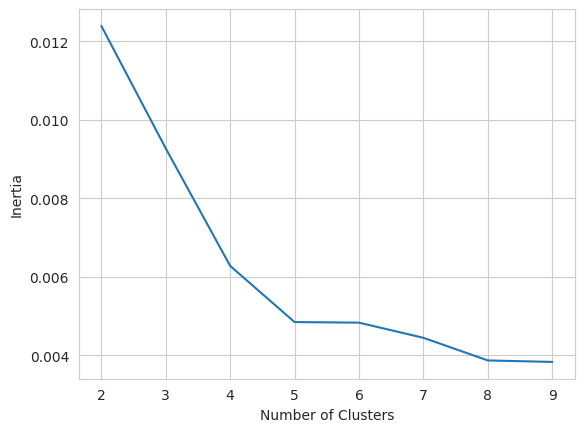

In [44]:
# Cargamos los datos
df = data

# Elimina filas con valores NaN
df = df.dropna()

df['Fecha_Intervalo'] = pd.to_datetime(df['Fecha'].dt.strftime('%Y-%m-%d') + ' ' + df['Intervalo'].astype(str))

# Ordenamos el DataFrame por esta nueva columna
df.sort_index(inplace=True)

# Creamos un subconjunto de nuestro DataFrame con las columnas de interés
variables = ['CSAT ', 'PD', '% SLA', 'Cierres', '% Reopen', 'RT (min)', 'AHT (min)']
data = df[variables]

# K-Shape requiere que los datos estén en un formato 3D específico [n_samples, n_timestamps, n_dimensions]
# En este caso, cada "dimension" es una de las variables
data_3d = np.array(data).reshape((data.shape[0], data.shape[1], 1))

# K-Shape también requiere que los datos estén normalizados
scaler = TimeSeriesScalerMeanVariance()
data_scaled = scaler.fit_transform(data_3d)

# Rango de valores de clusters que vamos a probar
num_clusters = list(range(2,10))

# Vamos a almacenar las inercias para cada número de clusters
inertias = []

# Iteramos sobre el rango de valores de clusters
for n in num_clusters:
    kshape = KShape(n_clusters=n, n_init=10, verbose=True, random_state=42)
    kshape.fit(data_scaled)
    inertias.append(kshape.inertia_)

# Graficamos las inercias
plt.plot(num_clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
# Elegimos el número de clusters con la menor inercia
optimal_clusters = num_clusters[np.argmin(inertias)]
print('Número óptimo de clusters: ', optimal_clusters)

# Creamos y ajustamos nuestro modelo K-Shape con el número óptimo de clusters
kshape = KShape(n_clusters=optimal_clusters, n_init=10, verbose=True, random_state=42)
kshape.fit(data_scaled)

# Añadimos las etiquetas de los clusters a nuestro DataFrame original
df['Cluster'] = kshape.labels_

# Agrupamos por cluster y calculamos la media de cada variable
cluster_summary = df.groupby('Cluster')[variables].mean()

print(cluster_summary)

Número óptimo de clusters:  9
Init 1
0.007 --> 0.014 --> 
Init 2
0.004 --> 0.009 --> 
Init 3
0.004 --> 0.010 --> 
Init 4
0.005 --> 0.012 --> 
Init 5
0.005 --> 0.012 --> 
Init 6
Resumed because of empty cluster
Init 6
0.006 --> 0.011 --> 
Init 7
0.004 --> 0.011 --> 
Init 8
0.004 --> 0.011 --> 
Init 9
0.005 --> 0.011 --> 
            CSAT         PD      % SLA     Cierres   % Reopen    RT (min)  \
Cluster                                                                     
0        2.785431  9.320165  86.666667   52.200000  28.475282   79.032454   
1        2.398158  9.400260  83.194805  212.008658  12.360169  202.902906   
2        2.777878  6.427330  93.054983   90.793814  14.729340   17.478092   
3        2.678029  8.108801  88.638298   49.453901  15.230241  174.544924   
4        2.480397  8.227727  88.806112  310.680717  16.808064   21.173645   
5        2.526500  6.635607  88.574419  176.734884  17.471860   40.636694   
6        2.594060  7.982363  90.722561  240.684959  12.080900 

Ahora, podemos inferir algunas características generales de cada cluster:

Cluster 0: Este cluster tiene un CSAT promedio de 2.79, que es más alto que la media general (2.53). Su tiempo promedio de manejo (AHT) es 31.74 minutos, significativamente más alto que la media general (11.08), lo que sugiere que las interacciones son más complejas o requieren más tiempo para resolver. A pesar de estos desafíos, la tasa de cumplimiento del SLA es alta, en 86.67%, pero la tasa de reapertura es alta (28.48%), lo que sugiere que aunque la resolución es rápida, la calidad puede estar por debajo de lo esperado, conduciendo a la reapertura de los casos.

Cluster 1: Este cluster gestiona un número de interacciones bastante alto (212.01), sin embargo, su CSAT es el más bajo (2.4). Esto indica que los clientes no están completamente satisfechos con el servicio prestado. Además, su tasa de reapertura es bastante baja (12.36%), lo que puede indicar que, aunque el servicio no sea el mejor calificado, las soluciones proporcionadas son efectivas y no requieren reapertura.

Cluster 2: Este cluster tiene una alta tasa de cumplimiento de SLA (93.05%) y un CSAT de 2.78, que está por encima del CSAT promedio. Lo destacable de este cluster es su baja tasa de reapertura (14.73%) y la más baja de los tiempos de resolución y manejo (17.48 y 9.97 minutos respectivamente), lo que indica eficiencia y efectividad en el manejo de las interacciones.

Cluster 3: Este cluster tiene un tiempo de manejo y resolución significativamente altos (174.54 y 11.11 minutos respectivamente), a pesar de un CSAT moderado (2.67) y una tasa de reapertura de (15.23%). Esto sugiere que este cluster puede estar lidiando con interacciones más complejas que requieren más tiempo para resolver, pero aún así, las soluciones proporcionadas son efectivas, como lo demuestra la baja tasa de reapertura.

Cluster 4: Este cluster gestiona la mayor cantidad de interacciones (310.68), sin embargo, su CSAT es bastante bajo (2.48). Los tiempos de manejo y resolución son bajos (21.17 y 10.94 minutos respectivamente) lo que indica una alta eficiencia, pero la calidad del servicio puede no estar a la altura, como lo demuestra el CSAT más bajo.

Cluster 5: Este cluster tiene características moderadas, con CSAT (2.53), tiempo de manejo (40.63 minutos) y resolución (9.88 minutos) en torno a la media. La tasa de cumplimiento de SLA es ligeramente superior a la media (88.57%).

Cluster 6: Este cluster tiene una tasa de reapertura baja (12.08%), lo que indica que las soluciones brindadas son bastante efectivas. Sin embargo, a pesar de un tiempo de manejo y resolución bajo (22.19 y 11.07 minutos respectivamente) su CSAT es solo 2.59, que es ligeramente superior a la media.

Cluster 7: Este cluster tiene el tiempo de resolución más alto de todos los clusters (451.09 min). A pesar de esto, el tiempo de manejo es bajo (10.56 minutos) y el CSAT es el segundo más bajo entre los clusters (2.43). Este cluster podría estar lidiando con interacciones muy complejas que requieren mucho tiempo para resolver.

Cluster 8: Este cluster maneja una gran cantidad de interacciones (251.04), y tiene una tasa de cumplimiento de SLA baja (82.85%), el más bajo entre los clusters, lo que sugiere que el servicio proporcionado puede estar por debajo del nivel esperado.

Ahora, realizaremos el mismo k-shape pero con el **coeficiente de silueta**, que es una medida de cuán cerca están cada punto en un cluster a los puntos en los clusters vecinos. Este coeficiente varía entre -1 y 1, donde un valor alto indica que los puntos están bien agrupados y un valor bajo indica que los puntos están mal agrupados. Al igual que con el método del codo, se puede ejecutar el algoritmo de k-means para un rango de valores de k y luego graficar el coeficiente de silueta para cada valor de k. El valor de k que maximiza el coeficiente de silueta es una buena elección para el número óptimo de clusters.

La medida de silueta es una medida de cuán bien asignado está un punto a su cluster en comparación con otros clusters. La medida de silueta para un punto varía entre -1 y 1, donde un valor alto indica que el punto está bien emparejado con su propio cluster y mal emparejado con los clusters vecinos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración del clustering es apropiada.

El método de la silueta nos ayuda mediante una representación gráfica de cuán bien está cada objeto asignado a su cluster. El gráfico de silueta muestra una medida de cuán cerca cada punto en un cluster está a los puntos en los clusters vecinos.

Solo para comparar, tanto la inercia como la medida de silueta proporcionan formas de cuantificar la calidad de una solución de clustering. Sin embargo, se centran en aspectos ligeramente diferentes: la inercia se centra en minimizar la distancia dentro del cluster, mientras que la silueta se centra tanto en minimizar la distancia dentro del cluster como en maximizar la distancia entre los clusters. Así que mientras que el método del codo utiliza inercia, el método de la silueta utiliza la medida de la silueta, es importante que quede clara la diferencia entre las medidas.

Init 1
0.016 --> 0.022 --> 
Init 2
0.017 --> 0.023 --> 
Init 3
0.025 --> 0.028 --> 
Init 4
0.015 --> 0.023 --> 
Init 5
0.015 --> 0.024 --> 
Init 6
0.014 --> 0.024 --> 
Init 7
0.012 --> 0.024 --> 
Init 8
0.016 --> 0.022 --> 
Init 9
0.013 --> 0.024 --> 
Init 10
0.013 --> 0.024 --> 
Init 1
0.013 --> 0.017 --> 
Init 2
0.013 --> 0.023 --> 
Init 3
0.011 --> 0.016 --> 
Init 4
0.009 --> 0.015 --> 
Init 5
0.010 --> 0.020 --> 
Init 6
0.010 --> 0.020 --> 
Init 7
0.009 --> 0.018 --> 
Init 8
0.011 --> 0.020 --> 
Init 9
0.009 --> 0.016 --> 
Init 10
0.012 --> 0.023 --> 
Init 1
0.011 --> 0.016 --> 
Init 2
0.010 --> 0.018 --> 
Init 3
0.006 --> 0.013 --> 
Init 4
0.008 --> 0.016 --> 
Init 5
0.009 --> 0.017 --> 
Init 6
0.009 --> 0.018 --> 
Init 7
0.008 --> 0.013 --> 
Init 8
0.006 --> 0.015 --> 
Init 9
0.012 --> 0.015 --> 
Init 10
0.012 --> 0.014 --> 
Init 1
0.011 --> 0.018 --> 
Init 2
0.008 --> 0.016 --> 
Init 3
0.005 --> 0.013 --> 
Init 4
0.006 --> 0.014 --> 
Init 5
0.007 --> 0.014 --> 
Init 6
0.010 --> 

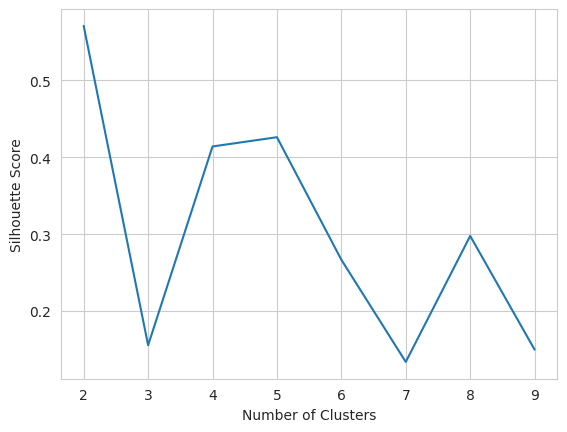

In [50]:
# Cargamos los datos
df = data

# Elimina filas con valores NaN
df = df.dropna()

df['Fecha_Intervalo'] = pd.to_datetime(df['Fecha'].dt.strftime('%Y-%m-%d') + ' ' + df['Intervalo'].astype(str))

# Ordenamos el DataFrame por esta nueva columna
df.sort_index(inplace=True)

# Creamos un subconjunto de nuestro DataFrame con las columnas de interés
variables = ['CSAT ', 'PD', '% SLA', 'Cierres', '% Reopen', 'RT (min)', 'AHT (min)']
data = df[variables]

# K-Shape requiere que los datos estén en un formato 3D específico [n_samples, n_timestamps, n_dimensions]
# En este caso, cada "dimension" es una de las variables
data_3d = np.array(data).reshape((data.shape[0], data.shape[1], 1))

# K-Shape también requiere que los datos estén normalizados
scaler = TimeSeriesScalerMeanVariance()
data_scaled = scaler.fit_transform(data_3d)

# Aplanamos los datos para el cálculo del score de silueta
data_scaled_2d = data_scaled.reshape((data_scaled.shape[0], data_scaled.shape[1]))

# Rango de valores de clusters que vamos a probar
num_clusters = list(range(2,10))

# Vamos a almacenar los scores de silueta para cada número de clusters
silhouette_scores = []

# Iteramos sobre el rango de valores de clusters
for n in num_clusters:
    kshape = KShape(n_clusters=n, n_init=10, verbose=True, random_state=42)
    kshape.fit(data_scaled)
    score = silhouette_score(data_scaled_2d, kshape.labels_)
    silhouette_scores.append(score)

# Graficamos los scores de silueta
plt.plot(num_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [51]:
# Elegimos el número de clusters con el mayor score de silueta
optimal_clusters = num_clusters[np.argmax(silhouette_scores)]
print('Número óptimo de clusters: ', optimal_clusters)

# Creamos y ajustamos nuestro modelo K-Shape con el número óptimo de clusters
kshape = KShape(n_clusters=optimal_clusters, n_init=10, verbose=True, random_state=42)
kshape.fit(data_scaled)

# Añadimos las etiquetas de los clusters a nuestro DataFrame original
df['Cluster'] = kshape.labels_

# Agrupamos por cluster y calculamos la media de cada variable
cluster_summary = df.groupby('Cluster')[variables].mean()

print(cluster_summary)

Número óptimo de clusters:  2
Init 1
0.016 --> 0.022 --> 
Init 2
0.017 --> 0.023 --> 
Init 3
0.025 --> 0.028 --> 
Init 4
0.015 --> 0.023 --> 
Init 5
0.015 --> 0.024 --> 
Init 6
0.014 --> 0.024 --> 
Init 7
0.012 --> 0.024 --> 
Init 8
0.016 --> 0.022 --> 
Init 9
0.013 --> 0.024 --> 
Init 10
0.013 --> 0.024 --> 
            CSAT         PD      % SLA     Cierres   % Reopen    RT (min)  \
Cluster                                                                     
0        2.462870  9.435398  85.925801  133.596965  13.046467  314.840010   
1        2.549918  7.805535  89.159053  237.733911  15.114207   36.710534   

         AHT (min)  
Cluster             
0        10.448304  
1        10.838778  


Con el método de la silueta se obtuvieron solo dos clusters, el hecho de que se haya determinado que dos clusters es el número óptimo sugiere que la separación entre estos dos grupos es significativamente mayor que la que se obtendría con un número mayor de clusters. En otras palabras, los datos se agrupan naturalmente en dos grupos distintos, y cualquier agrupación adicional no proporcionaría una separación significativa.

Esta es la interpretación de los cluster:

Cluster 0: Este cluster tiene un CSAT ligeramente inferior a la media (2.46 frente a la media de 2.53). Este cluster también tiene un tiempo de manejo de las interacciones ligeramente por debajo de la media (10.45 minutos frente a la media de 11.08 minutos). El tiempo de resolución es bastante más alto que la media (314.84 minutos frente a la media de 100.53 minutos), lo que podría indicar que este cluster maneja interacciones más complejas o difíciles que toman más tiempo para resolverse. La tasa de cumplimiento de SLA en este cluster es baja (85.93%) en comparación con la media (88.5%), lo que podría sugerir dificultades para cumplir con los tiempos de resolución esperados. Este cluster también tiene una tasa de reapertura ligeramente inferior a la media (13.05% frente a la media de 14.46%).

Cluster 1: Este cluster tiene un CSAT ligeramente superior a la media (2.55 frente a la media de 2.53). El tiempo de manejo de las interacciones en este cluster es ligeramente inferior a la media (10.84 minutos frente a la media de 11.08 minutos), pero el tiempo de resolución es significativamente más bajo que la media (36.71 minutos frente a la media de 100.53 minutos), lo que podría indicar que este cluster maneja interacciones menos complejas o más sencillas. La tasa de cumplimiento de SLA en este cluster es alta (89.16%) en comparación con la media (88.5%), lo que indica un buen rendimiento en términos de cumplimiento de los tiempos de resolución esperados. Sin embargo, este cluster tiene una tasa de reapertura ligeramente superior a la media (15.11% frente a la media de 14.46%), lo que podría sugerir que hay espacio para mejorar en términos de la efectividad de las resoluciones proporcionadas.

###**Estrategia para el mejoramiento y distribuccion de malla de turnos**

No sé si ya se haya implementado pero una buena estrategia puede ser identificar las características de los agentes que mejor se desempeñan en cada uno de los clusters y utilizar esta información para la formación y asignación de tareas. Por ejemplo, si vemos que los agentes en un cluster particular tienen tiempos de manejo (AHT) más bajos y puntuaciones de satisfacción del cliente (CSAT) más altas, se puede investigar qué habilidades o prácticas están empleando estos agentes y tratar de replicarlas en otros grupos. Esto puede involucrar la formación en habilidades específicas, cambios en el proceso o la reasignación de ciertos tipos de casos a agentes con habilidades particulares que también puede ser el caso.

La idea es asignar roles y responsabilidades en un centro de llamadas o un entorno de servicio al cliente en función de las habilidades individuales de los agentes y su eficiencia en diversas tareas. La estrategia busca mejorar la satisfacción del cliente al asignar a los agentes más calificados a las tareas que mejor se adaptan a sus habilidades, a la vez que maximiza la eficiencia operativa del call center.

Lo primero sería evaluar las habilidades y competencias de cada agente. La evaluación podría incluir aspectos como la capacidad de comunicación, el conocimiento del producto o servicio, la habilidad para resolver problemas, la empatía, entre otros. Estas evaluaciones podrían realizarse mediante revisiones de rendimiento, pruebas de habilidades, retroalimentación de los clientes, y otros medios.

Una vez que se han evaluado las habilidades de los agentes, el siguiente paso sería asignarles tareas que se alineen con sus habilidades. Por ejemplo, los agentes que demuestren una excelente habilidad para resolver problemas podrían asignarse a atender a clientes con consultas técnicas complicadas. Por otro lado, los agentes con habilidades de comunicación brutales podrían ser más efectivos al tratar con clientes difíciles o al manejar consultas generales.

La estrategia de asignación basado en habilidades no solo puede mejorar la eficiencia operativa al reducir el tiempo requerido para resolver consultas, sino que también puede mejorar la satisfacción del cliente al asegurarse de que sus consultas sean manejadas por los agentes más calificados.

En términos de eficiencia, es importante considerar no solo las habilidades de los agentes, sino también su rendimiento en términos de métricas clave como el tiempo medio de manejo de llamadas (AHT), el tiempo de resolución (RT), el porcentaje de llamadas resueltas en la primera interacción, entre otras. Los agentes que regularmente cumplen o superan estas métricas pueden ser considerados como altamente eficientes y podrían ser asignados a tareas más desafiantes o recibir más responsabilidades.

##**Ejercicio 3**


Analicemos de la mejor manera este ejercicio. Se nos dice que de acuerdo a la trazabilidad histórica (lo que me pone a pensar en series temporales) y la data, realizar un modelo predictivo que dado un Inflow, agentes programados (Asumo que es Conectados) y un intervalo, predecir SLA, CSAT, PD. Es decir, múltiples variables respuesta. Vamos a abordar esto desde lo técnico.

Si tenemos varias variables respuesta, hay varias opciones, una es un modelo de aprendizaje automático multivariante, otra puede ser un modelo de series de tiempo. La verdad no es muy común realizar modelos de aprendizaje automático con múltiples variables respuesta porque son complicados de implementar y de interpretar y además pueden no funcionar muy bien si hay problemas de multicolinealidad en las variables respuesta.

Se podría pensar en realizar modelos de regresión separados para cada variable (SLA, CSAT y PD) que es lo que finalmente haré, así podría lograrse un mejor rendimiento que con un modelo multivariante. La otra opción de modelos de series temporales no tiene sentido ya que, si bien, hay un componente de variación en el tiempo, se nos fueron entregadas variables de entrada lo que es propio y sugerente para modelos de aprendizaje automático ya que la variable respuesta no dependería solo del tiempo, si no también de otros factores.

Sin embargo, es necesario hacer una precisión, la variable Intervalo en el dataset contiene las mediciones de las características en intervalos de media hora y el valor correspondiente a la variable de Intervalo que se entregó es de una hora, por tanto es necesario modificar el dataset para que esté en las mismas unidades que las variables de entrada. Acá vamos a realizar varios supuestos:

Los intervalos serán de una hora, y los valores de inflow, Conectados y PD se van a sumar en dos registros consecutivos de media hora, con el fin de obtener el valor de esas variables por intervalos de una hora. Por su parte, las variables de SLA y CSAT se van a promediar ya que no son variables que se puedan agregar mediante la suma pues no son acumulativas, son scores o puntajes, por lo mismo se promedian para tener una estimación del valor de dichas variables en intervalos de una hora.

In [8]:
df = data

# Crear un nuevo DataFrame vacío
new_df = pd.DataFrame(columns=['Intervalo', 'Inflow', 'Conectados', 'PD', '% SLA', 'CSAT '])

# Iterar sobre cada segunda fila en el DataFrame original
for i in range(0, df.shape[0], 2):
    # Asegurarse de que no se salga del límite del DataFrame
    if i + 1 < df.shape[0]:
        # Crear un diccionario con los nuevos valores calculados
        new_row = {
            'Intervalo': df.iloc[i]['Intervalo'],
            'Inflow': df.iloc[i]['Inflow'] + df.iloc[i+1]['Inflow'],
            'Conectados': df.iloc[i]['Conectados'] + df.iloc[i+1]['Conectados'],
            'PD': df.iloc[i]['PD'] + df.iloc[i+1]['PD'],
            '% SLA': (df.iloc[i]['% SLA'] + df.iloc[i+1]['% SLA']) / 2,
            'CSAT ': (df.iloc[i]['CSAT '] + df.iloc[i+1]['CSAT ']) / 2
        }
        # Añadir la nueva fila al nuevo DataFrame
        new_df = new_df.append(new_row, ignore_index=True)

# Imprimir el nuevo DataFrame
print(new_df)


     Intervalo  Inflow  Conectados         PD  % SLA     CSAT 
0     00:00:00   150.0        20.0  21.704312   67.5  1.865385
1     01:00:00    59.0        11.0  20.888820   75.0  1.966667
2     02:00:00    35.0         5.0  22.274492   85.0       NaN
3     03:00:00    25.0         6.0  21.157058   80.0  1.000000
4     04:00:00    13.0         5.0  39.224913   76.5       NaN
...        ...     ...         ...        ...    ...       ...
2156  19:00:00   720.0       174.0  20.132182   83.0  2.225121
2157  20:00:00   777.0       156.0  19.937580   84.5  2.034470
2158  21:00:00   637.0       132.0  20.184777   83.5  2.100490
2159  22:00:00   423.0        80.0  20.823605   83.0  2.553512
2160  23:00:00   225.0        50.0  19.860915   85.0  2.178571

[2161 rows x 6 columns]


Se tiene entonces un dataset donde los intervalos están en franjas de una hora, queda con 2161 registros. Con diferentes valores eran nulos entonces es necesario eliminar los registros con nulos.

In [9]:
# Elimina filas con valores NaN
new_df = new_df.dropna()

# Obtener información de los datos.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 0 to 2160
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Intervalo   1773 non-null   object 
 1   Inflow      1773 non-null   float64
 2   Conectados  1773 non-null   float64
 3   PD          1773 non-null   float64
 4   % SLA       1773 non-null   float64
 5   CSAT        1773 non-null   float64
dtypes: float64(5), object(1)
memory usage: 97.0+ KB


Se usará un árbol de decisión para regresión pues su eficiencia se ha probado, para los siguientes tres datasets:

Intervalo, Inflow, Conectados, SLA

Intervalo, Inflow, Conectados, CSAT

Intervalo, Inflow, Conectados, PD

Siendo la última variable, la variable respuesta para cada conjunto de datos.

In [24]:
data_sla =  new_df[['Intervalo', 'Inflow', 'Conectados', '% SLA']]

data_csat = new_df[['Intervalo', 'Inflow', 'Conectados', 'CSAT ']]

data_pd = new_df[['Intervalo', 'Inflow', 'Conectados', 'PD']]

Es necesario saber que como los modelos en scikit-learn requieren entradas numéricas, se hace necesario convertir la característica de 'Intervalo' en una representación numérica. Sin embargo, no basta con convertir a 'Intervalo' en numérica. Tenemos que tener en cuenta las características de los datos paraa modelarlos, en este caso es necesario recordar que la hora del día es una característica cíclica, es decir, luego de las 23:00:00 sigue 00:00:00 que son horas muy cercanas pero en números, 0 de 23 es muy distante por lo que algunos modelos pueden presentar inconvenientes para manejar la naturaleza cíclica de la hora del día.

Usualmente el manejo que se le da a este tipo de datos es crear dos nuevas características, una para la hora del seno y otra para la hora del coseno, esto permitirá que la distancia entre 23:00:00 y 00:00:00 sea pequeña y por supuesto, incrementa el desempeño de los modelos de aprendizaje automático.

In [25]:
# Convertir la columna de intervalo en una hora numérica
data_sla['Hora'] = data_sla['Intervalo'].apply(lambda x: x.hour)

# Crear las características de seno y coseno
data_sla['sin_hora'] = np.sin(2 * np.pi * data_sla['Hora']/24)
data_sla['cos_hora'] = np.cos(2 * np.pi * data_sla['Hora']/24)

###**Predicción 1**

In [34]:
# Lista de columnas de características
feature_columns = ['sin_hora', 'cos_hora', 'Inflow', 'Conectados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data_sla[feature_columns]
y = data_sla['% SLA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = DecisionTreeRegressor(random_state=42)

# Definir la grilla de parámetros para buscar
parameters = {'max_depth': range(1, 20), 'min_samples_split': range(2, 20)}

# Configurar la búsqueda de la grilla
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=20)

# Realizar la búsqueda de la grilla
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f'Best parameters: {grid_search.best_params_}')

# Crear y entrenar el modelo con los mejores parámetros
best_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

Best parameters: {'max_depth': 11, 'min_samples_split': 9}
MSE: 20.89114729837057
MAE: 3.297628618618053
R^2: 0.36523707030059527


Se realizaron transformaciones logarítmicas a las características, se crearon características polinomiales, y nada funcionó para incrementar el R2 salvo incrementar el espacio de los hiperparámetros e incrementar el nivel de folds de la cross-validation, teniendo como resultado un MSE de 20.892, un MAE de 3.29 y un R2 de 36,5% (estaba en 31%). Esto significa que el modelo explica alrededor del 36.5% de la variación en los datos.

In [35]:
# El valor del intervalo que quieres predecir
Intervalo = 15

# Realizar la transformación circular
sin_hora, cos_hora = np.sin(2 * np.pi * Intervalo/24), np.cos(2 * np.pi * Intervalo/24)

# Los otros valores que quieres predecir
inflow = 378
conectados = 98

# Crear el vector de entrada para el modelo
input_vector = np.array([sin_hora, cos_hora, inflow, conectados]).reshape(1, -1)

# Hacer la predicción
prediccion = best_model.predict(input_vector)

print('La predicción es:', prediccion)


La predicción es: [88.]


Con un Intervalo: 3:00 pm - 4:00 pm ( es decir, hora 15), Inflow de 378 y Conectados 98 agentes, el SLA predicho es 88%.

###**Predicción 2**

In [39]:
# Convertir la columna de intervalo en una hora numérica
data_csat['Hora'] = data_csat['Intervalo'].apply(lambda x: x.hour)

# Crear las características de seno y coseno
data_csat['sin_hora'] = np.sin(2 * np.pi * data_csat['Hora']/24)
data_csat['cos_hora'] = np.cos(2 * np.pi * data_csat['Hora']/24)

# Lista de columnas de características
feature_columns = ['sin_hora', 'cos_hora', 'Inflow', 'Conectados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data_csat[feature_columns]
y = data_csat['CSAT ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = DecisionTreeRegressor(random_state=42)

# Definir la grilla de parámetros para buscar
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11)}

# Configurar la búsqueda de la grilla
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Realizar la búsqueda de la grilla
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f'Best parameters: {grid_search.best_params_}')

# Crear y entrenar el modelo con los mejores parámetros
best_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

Best parameters: {'max_depth': 3, 'min_samples_split': 2}
MSE: 0.11636695980856641
MAE: 0.22083640742570454
R^2: 0.24185784912983666


Se obtuvo un MSE de 0.1164, un MAE de 0.22 y un R2 de 24,2%, lo que indica que el modelo explica solo en un 24% la variabilidad.

In [40]:
# El valor del intervalo que quieres predecir
Intervalo = 15

# Realizar la transformación circular
sin_hora, cos_hora = np.sin(2 * np.pi * Intervalo/24), np.cos(2 * np.pi * Intervalo/24)

# Los otros valores que quieres predecir
inflow = 378
conectados = 98

# Crear el vector de entrada para el modelo
input_vector = np.array([sin_hora, cos_hora, inflow, conectados]).reshape(1, -1)

# Hacer la predicción
prediccion = best_model.predict(input_vector)

print('La predicción es:', prediccion)


La predicción es: [2.50317682]


Con un Intervalo: 3:00 pm - 4:00 pm ( es decir, hora 15), Inflow de 378 y Conectados 98 agentes, el CSAT predicho es 2.503.

###**Predicción 3**

In [41]:
# Convertir la columna de intervalo en una hora numérica
data_pd['Hora'] = data_pd['Intervalo'].apply(lambda x: x.hour)

# Crear las características de seno y coseno
data_pd['sin_hora'] = np.sin(2 * np.pi * data_pd['Hora']/24)
data_pd['cos_hora'] = np.cos(2 * np.pi * data_pd['Hora']/24)

# Lista de columnas de características
feature_columns = ['sin_hora', 'cos_hora', 'Inflow', 'Conectados']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data_pd[feature_columns]
y = data_pd['PD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = DecisionTreeRegressor(random_state=42)

# Definir la grilla de parámetros para buscar
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11)}

# Configurar la búsqueda de la grilla
grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=10)

# Realizar la búsqueda de la grilla
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(f'Best parameters: {grid_search.best_params_}')

# Crear y entrenar el modelo con los mejores parámetros
best_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

Best parameters: {'max_depth': 8, 'min_samples_split': 5}
MSE: 9.018542407089978
MAE: 1.95695732620192
R^2: 0.45688352420146927


Se obtuvo un MSE de 9.018, un MAE de 1.956 y un R2 de 45.7%, lo que indica que el modelo explica 46% la variabilidad de PD.

In [42]:
# El valor del intervalo que quieres predecir
Intervalo = 15

# Realizar la transformación circular
sin_hora, cos_hora = np.sin(2 * np.pi * Intervalo/24), np.cos(2 * np.pi * Intervalo/24)

# Los otros valores que quieres predecir
inflow = 378
conectados = 98

# Crear el vector de entrada para el modelo
input_vector = np.array([sin_hora, cos_hora, inflow, conectados]).reshape(1, -1)

# Hacer la predicción
prediccion = best_model.predict(input_vector)

print('La predicción es:', prediccion)

La predicción es: [14.72405979]


Con un Intervalo: 3:00 pm - 4:00 pm ( es decir, hora 15), Inflow de 378 y Conectados 98 agentes, el PD predicho es 14.73, es decir, casi 15 casos se pueden cerrar en un intervalo con esas características.